In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
application_train = pd.read_csv(r"d:\NEU\Credit-Risk-Analysis\data\dseb-63-data-preparation-final-project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")

In [3]:
application_train.duplicated().sum()

0

In [4]:
application_train.isnull().sum()

Unnamed: 0                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_WEEK    33211
AMT_REQ_CREDIT_BUREAU_MON     33211
AMT_REQ_CREDIT_BUREAU_QRT     33211
AMT_REQ_CREDIT_BUREAU_YEAR    33211
SK_ID_CURR                        0
Length: 123, dtype: int64

In [5]:
application_train = application_train.drop(columns = 'Unnamed: 0')
application_train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,90253
246005,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9027
246006,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,163598
246007,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,300375


In [6]:
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

In [7]:
application_train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
count,246009.000000,246009.000000,2.460090e+05,2.460090e+05,245999.000000,2.457850e+05,246009.000000,246009.000000,246009.000000,246009.000000,...,246009.000000,246009.000000,246009.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,246009.000000
mean,0.080794,0.416229,1.684589e+05,5.996410e+05,27120.238129,5.389827e+05,0.020855,-16038.946343,63852.612441,-4985.222248,...,0.000581,0.000496,0.000309,0.006480,0.006729,0.034211,0.266647,0.266920,1.901127,153580.509542
std,0.272519,0.720664,1.045297e+05,4.030980e+05,14510.634712,3.700520e+05,0.013818,4361.265483,141306.376949,3521.391396,...,0.024103,0.022264,0.017574,0.084239,0.106693,0.204336,0.911957,0.834132,1.870269,88764.127645
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-23416.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19682.000000,-2758.000000,-7482.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76772.000000
50%,0.000000,0.000000,1.462500e+05,5.147775e+05,24903.000000,4.500000e+05,0.018850,-15755.000000,-1212.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,153390.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34654.500000,6.795000e+05,0.028663,-12418.000000,-288.000000,-2006.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,230433.000000
max,1.000000,19.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,27.000000,261.000000,25.000000,307510.000000


In [8]:
application_train.shape

(246009, 122)

In [9]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100 # # Tính toán tỷ lệ giá trị thiếu cho mỗi cột và chuyển đổi nó thành phần trăm
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index) # # Loại bỏ các cột không có giá trị thiếu (df_null_percentage == 0)
    df_null_percentage = df_null_percentage.sort_values(ascending=False).reset_index() # Sắp xếp giảm dần theo tỷ lệ giá trị thiếu và đặt lại chỉ số
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(application_train)
null_df

,Feature,Percentage
0,COMMONAREA_MEDI,69.887687
1,COMMONAREA_AVG,69.887687
2,COMMONAREA_MODE,69.887687
3,NONLIVINGAPARTMENTS_MEDI,69.456402
4,NONLIVINGAPARTMENTS_MODE,69.456402
...,...,...
62,EXT_SOURCE_2,0.215033
63,AMT_GOODS_PRICE,0.091054
64,AMT_ANNUITY,0.004065
65,DAYS_LAST_PHONE_CHANGE,0.000406


<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

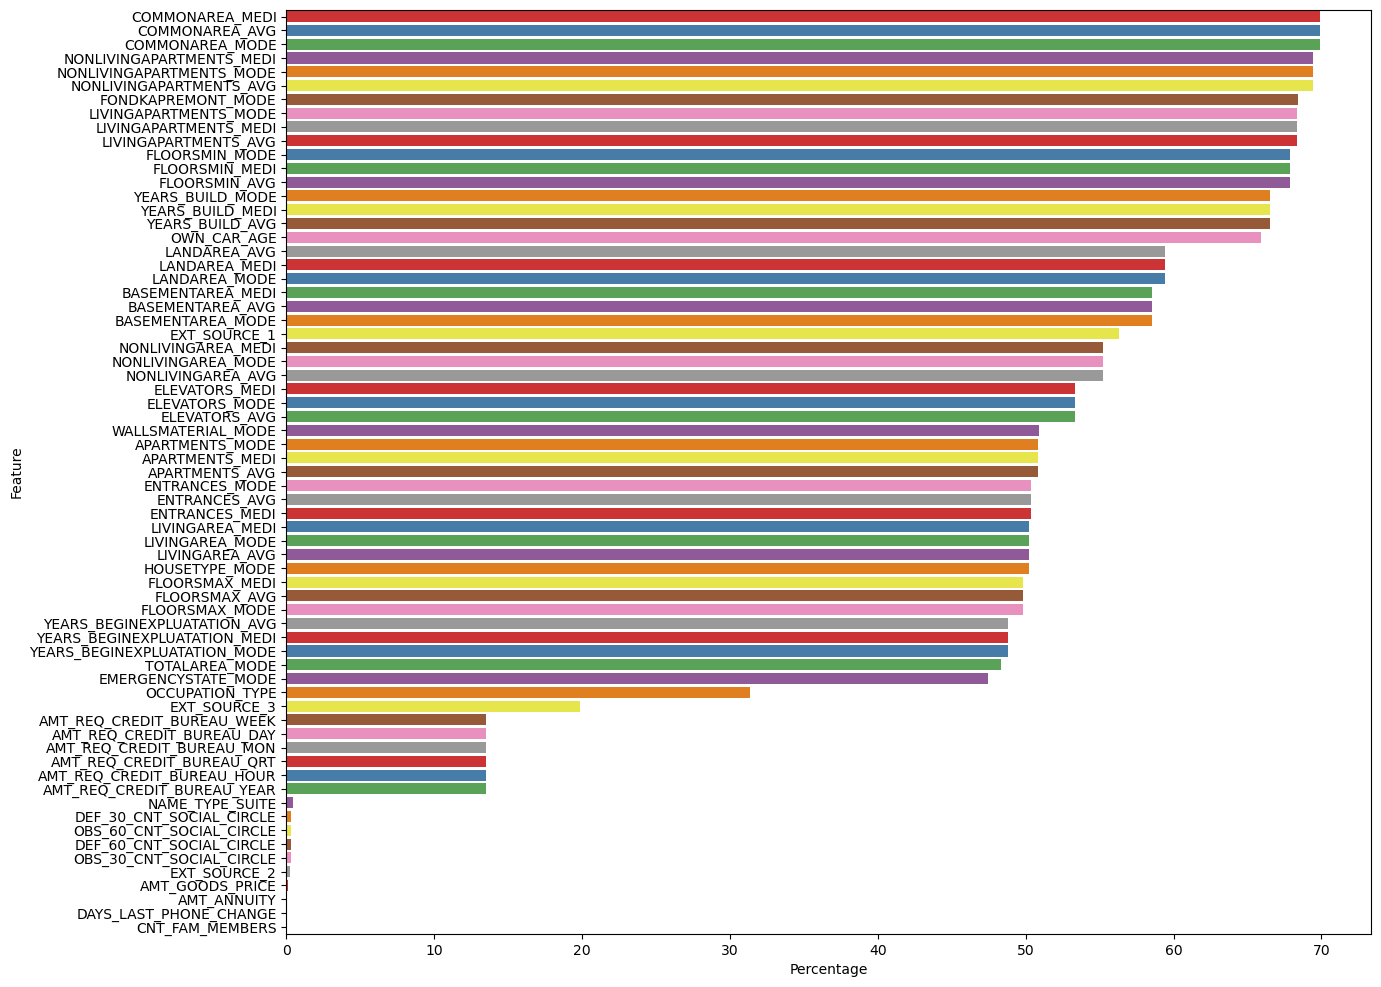

In [10]:
# tỷ lệ giá trị thiếu cho từng feature
plt.figure(figsize=(14,12))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"], palette = 'Set1' )

# OUTLIERS

In [11]:
numerical_col = application_train.select_dtypes(include='number').columns
numerical_col

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'SK_ID_CURR'],
      dtype='object', length=106)

In [12]:
len(numerical_col)

106

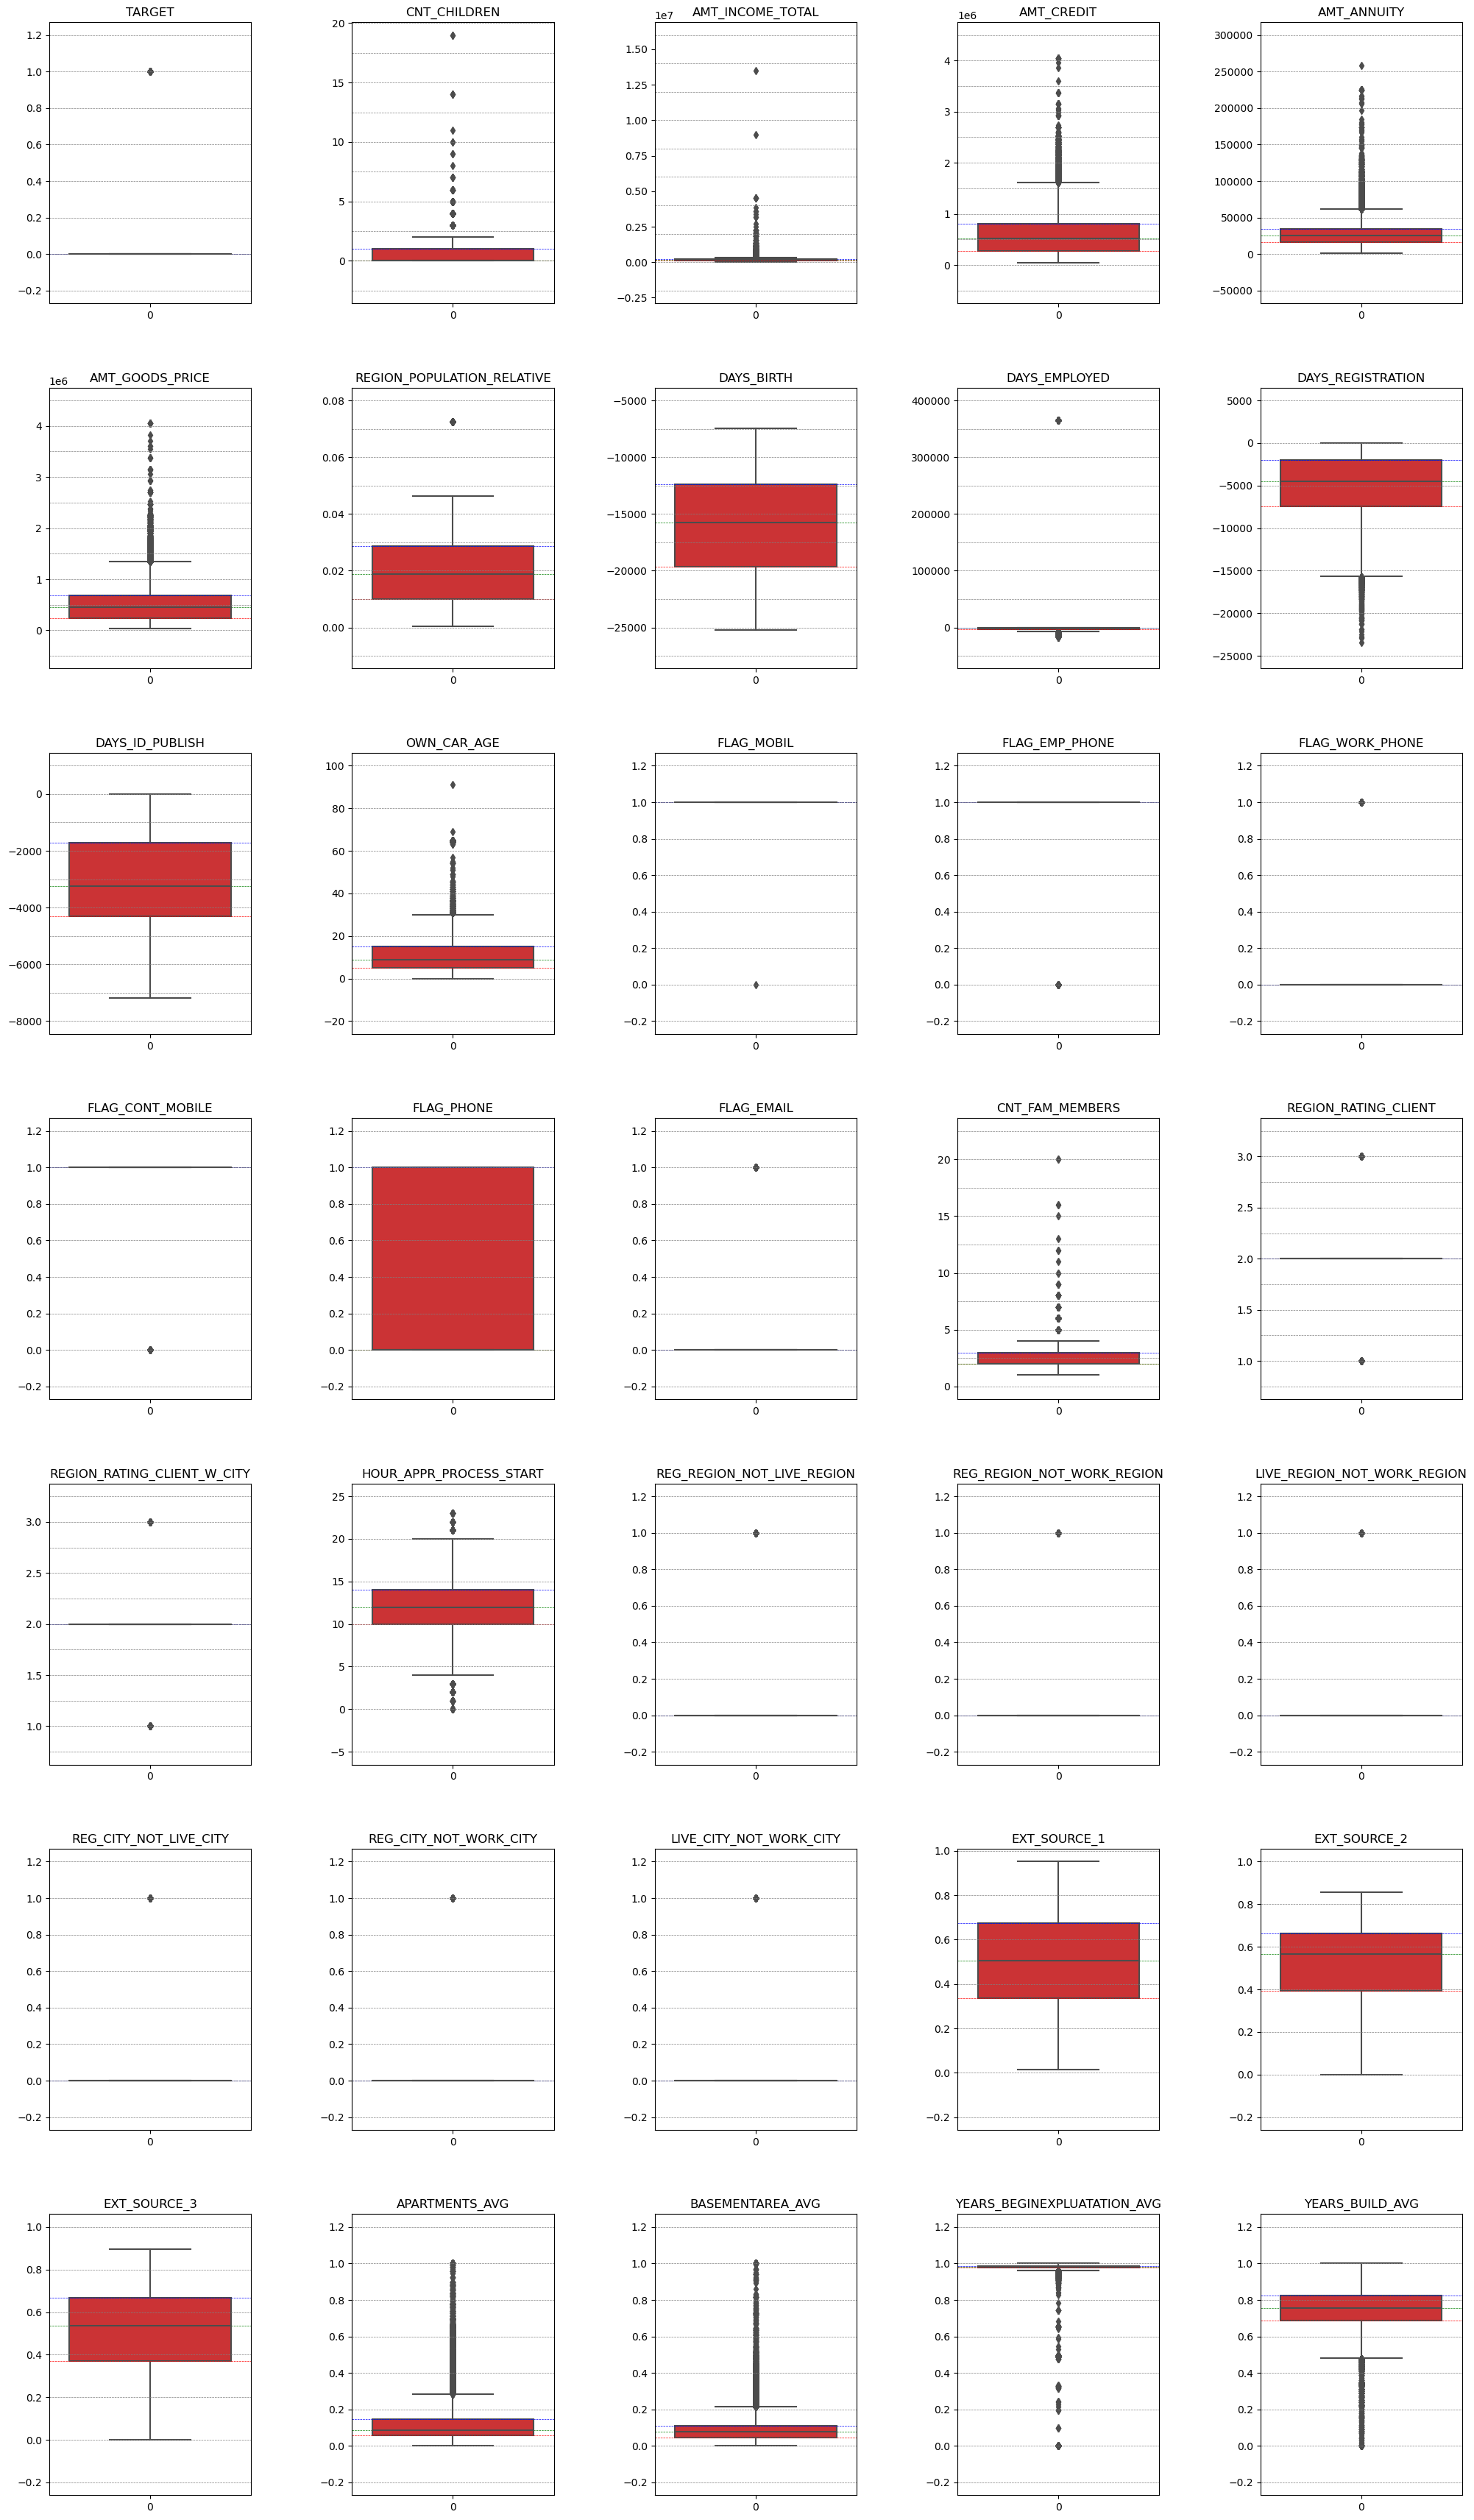

In [13]:
fig, axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True) # constrained_layout=True: điều chỉnh tỷ lệ kích thước và vị trí của các đối tượng trục (axes) trong lưới của một hình vẽ
fig.subplots_adjust(left= 0, bottom=0, right=3, top=7, wspace=0.5, hspace=0.3)

for ax, column in zip(axes.flatten(),numerical_col): # axes.flatten(): làm phẳng lưới thành một mảng 1 chiều để có thể sử dụng nó trong vòng lặp.       
    sns.boxplot(application_train[column],ax=ax, palette = 'Set1')

    # Tính quantiles (25th, 50th, 75th percentiles)
    q25 = application_train[column].quantile(0.25)
    q50 = application_train[column].quantile(0.50)
    q75 = application_train[column].quantile(0.75)
    # Vẽ các đường kẻ phụ ngang tương ứng với quantiles
    ax.axhline(y=q25, color='r', linestyle='--', linewidth=0.5, label='Q25')
    ax.axhline(y=q50, color='g', linestyle='--', linewidth=0.5, label='Q50')
    ax.axhline(y=q75, color='b', linestyle='--', linewidth=0.5, label='Q75')

    # Lấy giá trị của các ticks trên trục y
    ticks = ax.get_yticks()
    
    # Vẽ các đường kẻ phụ ngang tương ứng với các ticks
    for tick in ticks:
        ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

    ax.set_title(column) 

- CNT_CHILDREN có giá trị ngoại lệ khi có con trên 5 tuổi.
- IQR cho AMT_INCOME_TOTAL rất ít và nó có một số lượng lớn các ngoại lệ. -> do các khách hàng có thu nhập rất cao hoặc rất thấp
- Phần tư thứ ba của AMT_CREDIT lớn hơn so với phần tư thứ nhất, có nghĩa là phần lớn Số tiền Tín dụng của khoản vay của khách hàng nằm trong phần tư thứ ba. Và có một số lượng lớn các trường hợp ngoại lệ có mặt trong AMT_CREDIT. -> số tiền tín dụng và khoản trả hằng tháng chiếm phần lớn so với tổng giá trị
- Phần tư thứ ba AMT_ANNUITY lớn hơn một chút so với phần tư thứ nhất và có một số lượng lớn các giá trị ngoại lệ.
- Phần tư thứ ba của AMT_GOODS_PRICE, DAYS_REGISTRATION VÀ DAYS_LAST_PHONE_CHANGE lớn hơn so với phần tư thứ nhất và tất cả đều có số lượng lớn các ngoại lệ.
- IQR cho DAYS EMPLOYED rất ít. Hầu hết các giá trị ngoại lệ có mặt dưới 25000. Và một giá trị ngoại lệ hiện tại là 375000.
- CNT_FAM_MEMBERS: Hầu hết các khách hàng có 4 thành viên trong gia đình. 
- DAYS_BIRTH, DAYS_ID_PUBLISH và EXT_SOURCE_2, EXT_SOURCE_3 không có bất kỳ ngoại lệ nào.

# TARGET

In [14]:
target = application_train["TARGET"].value_counts() 
target = pd.DataFrame(target).reset_index()
target


,index,TARGET
0,0,226133
1,1,19876


Text(0.5, 1.0, 'Did customers have payment difficulties?')

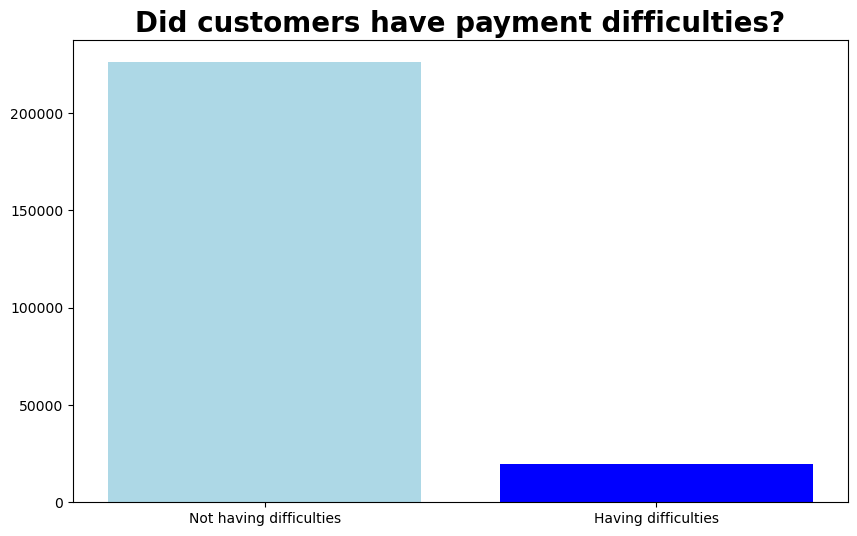

In [15]:
fig,ax0 = plt.subplots(figsize = (10,6))
ax0.bar(target.index,target.TARGET, color=['lightblue', 'blue'])
ax0.set_xticks([0,1])
x = ["Not having difficulties", 'Having difficulties' ]
plt.xticks([0,1], x)
plt.title('Did customers have payment difficulties?', size = 20, weight ='bold')

=> Đa số người vay không gặp khó khăn trong việc thanh toán. Có 1 sự chênh lệch lớn giữa những người trả đúng hạn và những người không trả đúng hạn (imbalanced dataset).
(Machine Learning: cân nhắc các lớp bằng cách visualize lại để phản ánh sự mất cân bằng này)

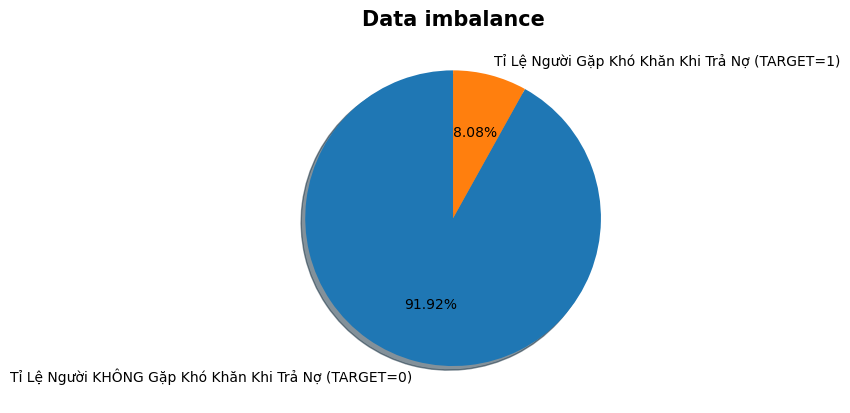

In [16]:
labels = ['Tỉ Lệ Người KHÔNG Gặp Khó Khăn Khi Trả Nợ (TARGET=0)', 'Tỉ Lệ Người Gặp Khó Khăn Khi Trả Nợ (TARGET=1)']
fig, ax = plt.subplots()
ax.pie(application_train["TARGET"].value_counts(normalize= True), labels=labels, autopct='%1.2f%%',shadow=True, startangle=90) # application_train["TARGET"].value_counts(normalize=True): Dữ liệu được sắp xếp theo thứ tự giảm dần của giá trị.
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.title('Data imbalance', fontweight='bold', fontsize=15)
plt.show()

# DOCUMENT

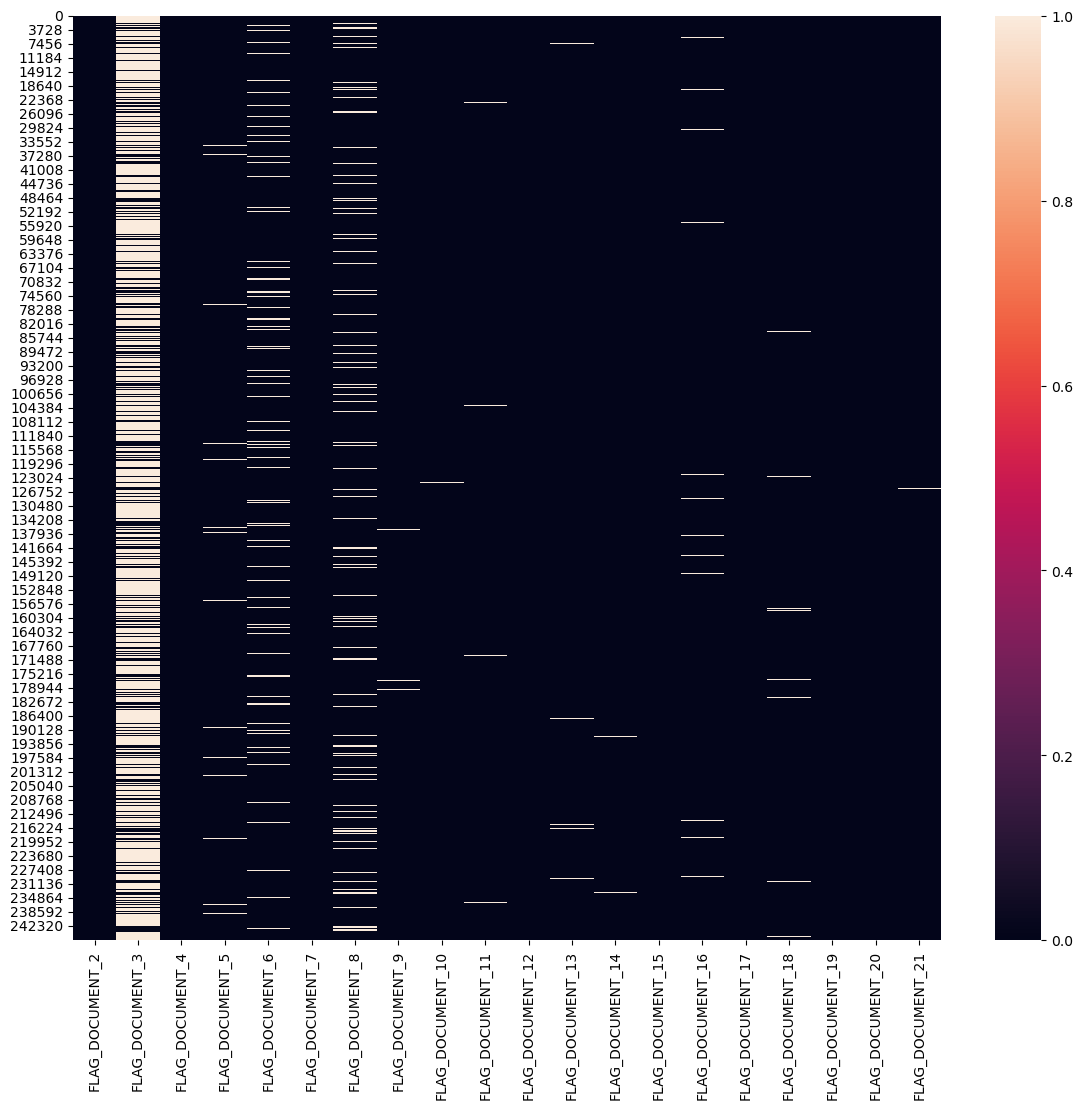

In [17]:
starting_idx = application_train.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = application_train.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(14,12))
sns.heatmap(application_train.iloc[:,starting_idx:ending_idx])
plt.show()

The percentage of 1s (ie. the client has submitted the document) is very small in most of the cases, which means that the data is highly imbalanced and its presence in the dataset is not going to help us very much. 
However, Flag_Document_3 has a good presence of 1s and we can remove all the Flag_Document columns except this one.

# Gender

In [18]:
a = application_train['CODE_GENDER'].value_counts()
a

F      161856
M       84150
XNA         3
Name: CODE_GENDER, dtype: int64

In [19]:
df = pd.DataFrame(a).reset_index()
df

,index,CODE_GENDER
0,F,161856
1,M,84150
2,XNA,3


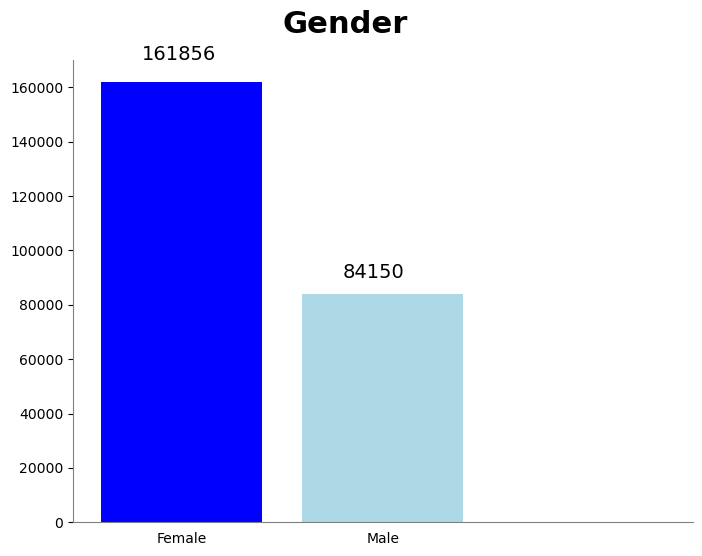

In [20]:
fig, ax0 = plt.subplots(figsize = (8,6))
ax0.bar(df.index,df.CODE_GENDER, color=['blue', 'lightblue'])
x = ['Female', 'Male']
plt.xticks([0,1],x)
ax0.tick_params(bottom=False)
ax0.spines[['top', 'right']].set_visible(False)
ax0.text(0.5, 180000, 'Gender', size=22, weight="bold")
ax0.spines[['left', 'bottom']].set_color('grey')
ax0.text(-0.2, 170000, '161856', size='14', alpha=1)
ax0.text(0.8,90000, '84150', size='14', alpha=1)
ax0.set_facecolor('white')
fig.set_facecolor('white')

=> Số lượng khách hàng Female vay tiền cao gấp đôi so với số lượng khách hàng Male.

In [21]:
# Tính % của nam và nữ gặp khó khăn khi trả nợ (Target == 1)
male_and_female = application_train[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
male_and_female

,CODE_GENDER,TARGET
0,F,0.070025
1,M,0.101509
2,XNA,0.000000


Text(0.5, 1.0, 'Percentage of Female and Male have difficulty repayed on time ')

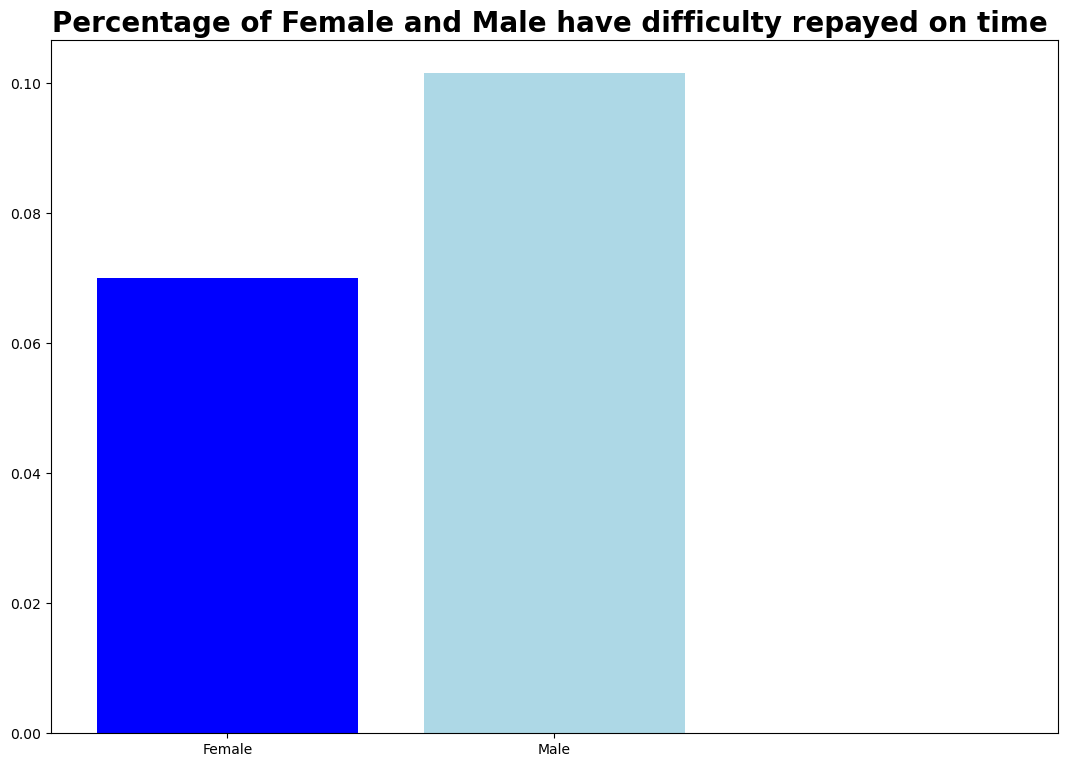

In [22]:
df = pd.DataFrame(male_and_female).reset_index()
fig,ax = plt.subplots(figsize = (13,9))
ax.bar(df.index,df.TARGET,color=['blue', 'lightblue'])
x= ["Female", 'Male']
plt.xticks([0,1], x)
ax.set_facecolor('white')
fig.set_facecolor('white')
ax.set_title('Percentage of Female and Male have difficulty repayed on time ', loc='center', size='20',weight = 'bold')

Mặc dù số lượng vay của Female gấp đôi số lượng Male, nhưng tỉ lệ gặp khó khăn trong việc trả nợ của Male (10%) lại cao hơn của Female (7%). 

# Age

In [23]:
application_train[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-16765,-1188,-1186.0,-291,-828.0
1,-19005,-3039,-9833.0,-2437,-617.0
2,-19932,-3038,-4311.0,-3458,-1106.0
3,-16941,-1588,-4970.0,-477,-2536.0
4,-18850,-449,-4597.0,-2379,-1070.0
...,...,...,...,...,...
246004,-9327,-236,-8456.0,-1982,-273.0
246005,-20775,365243,-4388.0,-4090,0.0
246006,-14966,-7921,-6737.0,-5150,-1909.0
246007,-11961,-4786,-2562.0,-931,-322.0


In [24]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()


print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.032089
DEF_30_CNT_SOCIAL_CIRCLE       0.032614
LIVE_CITY_NOT_WORK_CITY        0.033189
OWN_CAR_AGE                    0.036835
DAYS_REGISTRATION              0.041713
REG_CITY_NOT_LIVE_CITY         0.044483
FLAG_DOCUMENT_3                0.044547
FLAG_EMP_PHONE                 0.045672
REG_CITY_NOT_WORK_CITY         0.051018
DAYS_ID_PUBLISH                0.052217
DAYS_LAST_PHONE_CHANGE         0.053825
REGION_RATING_CLIENT           0.058058
REGION_RATING_CLIENT_W_CITY    0.060598
DAYS_BIRTH                     0.077633
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.180096
EXT_SOURCE_2                 -0.158824
EXT_SOURCE_1                 -0.154135
DAYS_EMPLOYED                -0.044639
FLOORSMAX_AVG                -0.044281
FLOORSMAX_MEDI               -0.043838
FLOORSMAX_MODE               -0.043344
AMT_GOODS_PRICE              -0.040660


In [25]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.0776330376728426

Giá trị ngày nhưng âm -> Phải convert lại

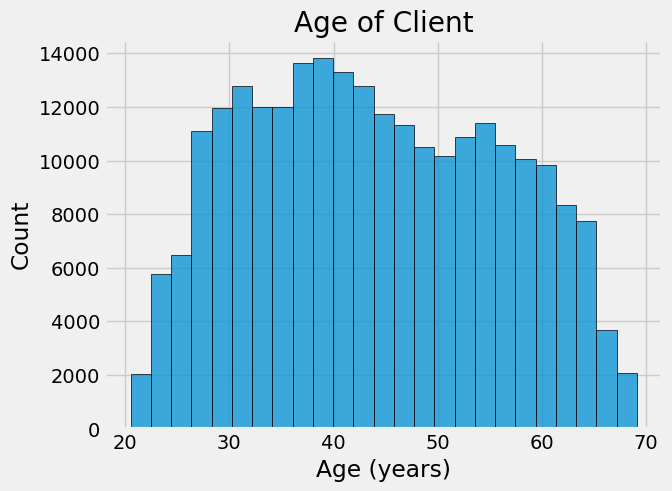

In [26]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
sns.histplot(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25, palette = 'Set1')
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

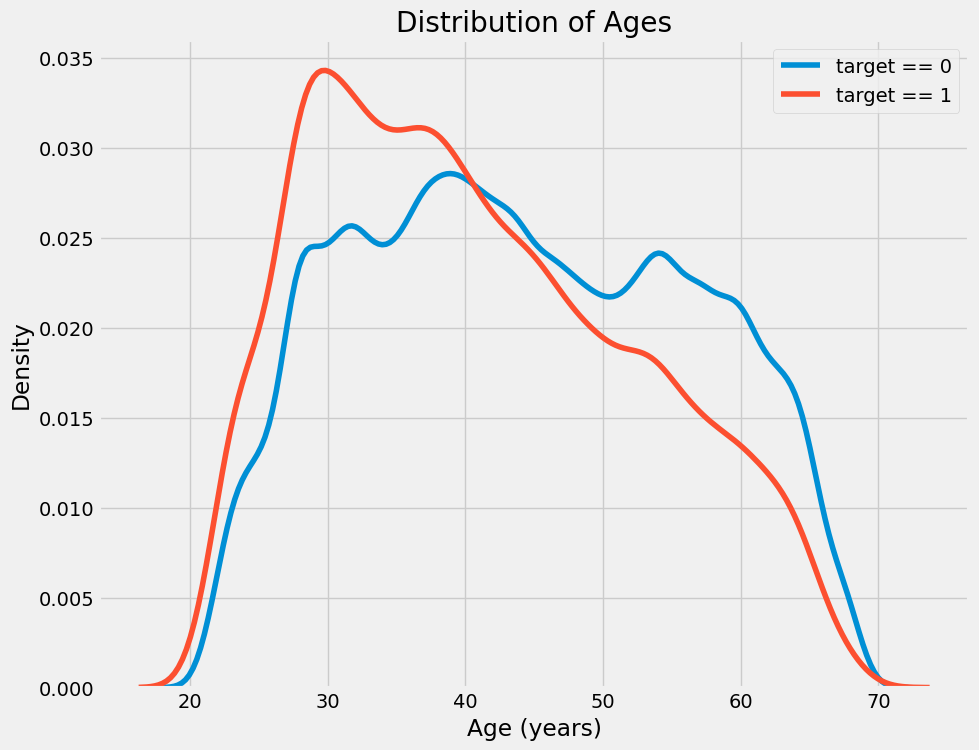

In [27]:
plt.figure(figsize = (10, 8))


sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')


sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend(loc='upper right')

In [28]:
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,0,16765,45.931507,"(45.0, 50.0]"
1,0,19005,52.068493,"(50.0, 55.0]"
2,0,19932,54.608219,"(50.0, 55.0]"
3,0,16941,46.413699,"(45.0, 50.0]"
4,0,18850,51.643836,"(50.0, 55.0]"
5,0,20099,55.065753,"(55.0, 60.0]"
6,0,14469,39.641096,"(35.0, 40.0]"
7,0,10197,27.936986,"(25.0, 30.0]"
8,0,14086,38.591781,"(35.0, 40.0]"
9,0,14583,39.953425,"(35.0, 40.0]"


In [29]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.124009,8532.664917,23.377164
"(25.0, 30.0]",0.111557,10155.047837,27.822049
"(30.0, 35.0]",0.102045,11853.509209,32.475368
"(35.0, 40.0]",0.088879,13708.826719,37.558429
"(40.0, 45.0]",0.078780,15497.591047,42.459154
"(45.0, 50.0]",0.075446,17323.275616,47.461029
"(50.0, 55.0]",0.066702,19197.510778,52.595920
"(55.0, 60.0]",0.055748,20984.759016,57.492490
"(60.0, 65.0]",0.052246,22776.998947,62.402737


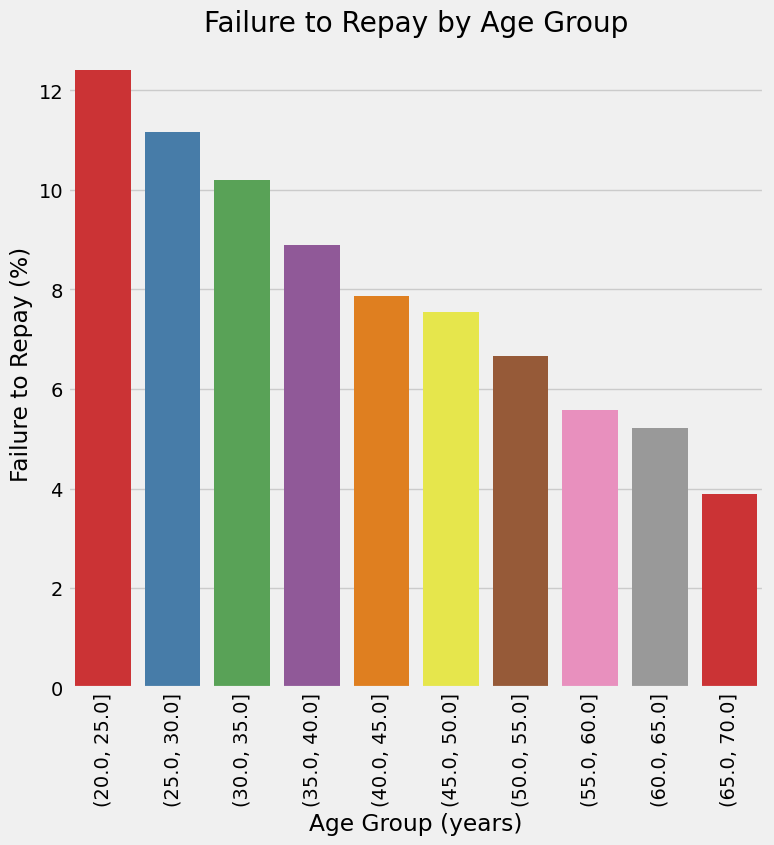

In [31]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
sns.barplot(x=age_groups.index.astype(str), y=100 * age_groups['TARGET'], palette='Set1')
# Plot labeling
plt.xticks(rotation = 90); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Những người trẻ thường không có khả năng trả nợ đúng hạn (Những người không trả được nợ nằm trong độ tuổi 2x, và số lượng người giảm đi khi độ tuổi tăng lên).
=> Yếu tố tuổi rất quan trọng -> Cần cho vào model ML

# DAYS info

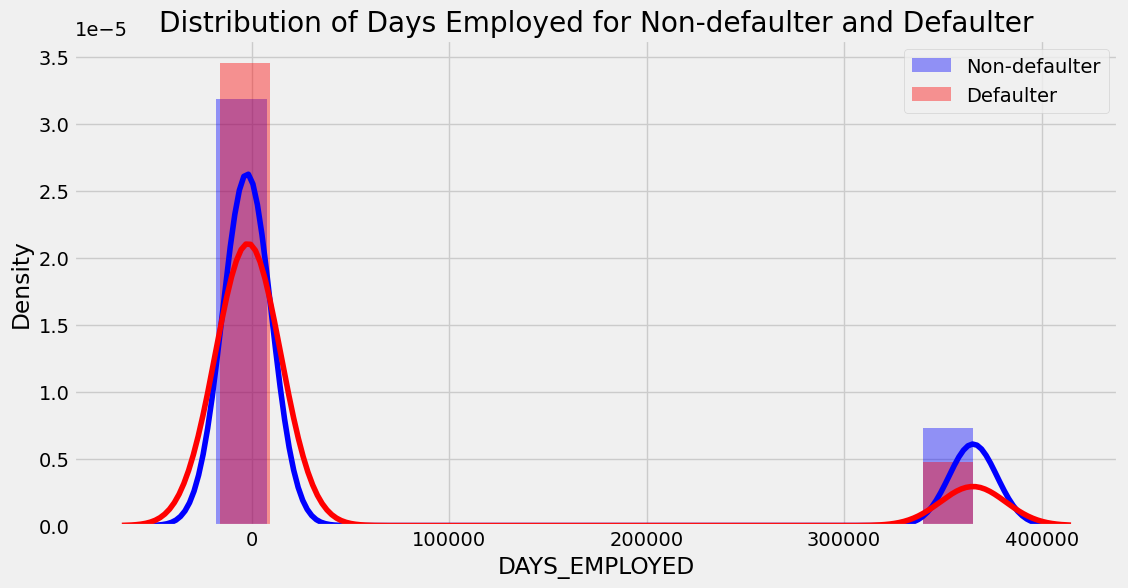

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ non-defaulters với màu xanh
sns.distplot(application_train[application_train["TARGET"] == 0]['DAYS_EMPLOYED'], bins=15, color='blue', label='Non-defaulter')

# Vẽ defaulters với màu đỏ
sns.distplot(application_train[application_train["TARGET"] == 1]['DAYS_EMPLOYED'], bins=15, color='red', label='Defaulter')

ax.set_title("Distribution of Days Employed for Non-defaulter and Defaulter")

ax.legend()
plt.show()


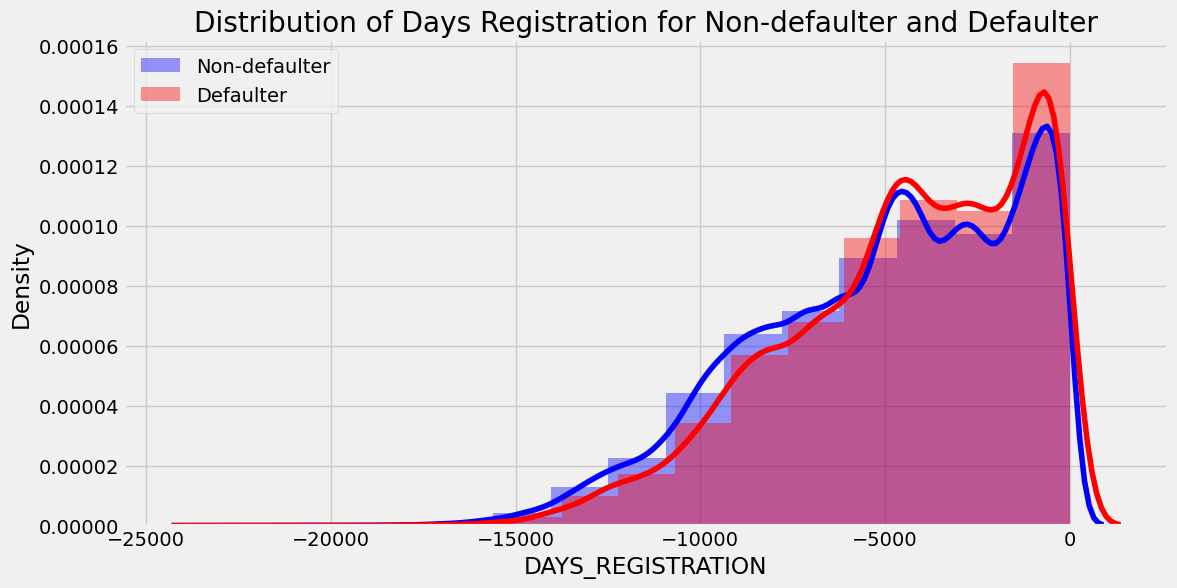

In [33]:
fig, ax = plt.subplots(figsize= (12,6))
sns.distplot(application_train[application_train["TARGET"] == 0]['DAYS_REGISTRATION'], bins= 15, color='blue', label='Non-defaulter')
sns.distplot(application_train[application_train["TARGET"] == 1]['DAYS_REGISTRATION'], bins= 15, color='red', label='Defaulter')

ax.set_title("Distribution of Days Registration for Non-defaulter and Defaulter")

ax.legend()
plt.show()


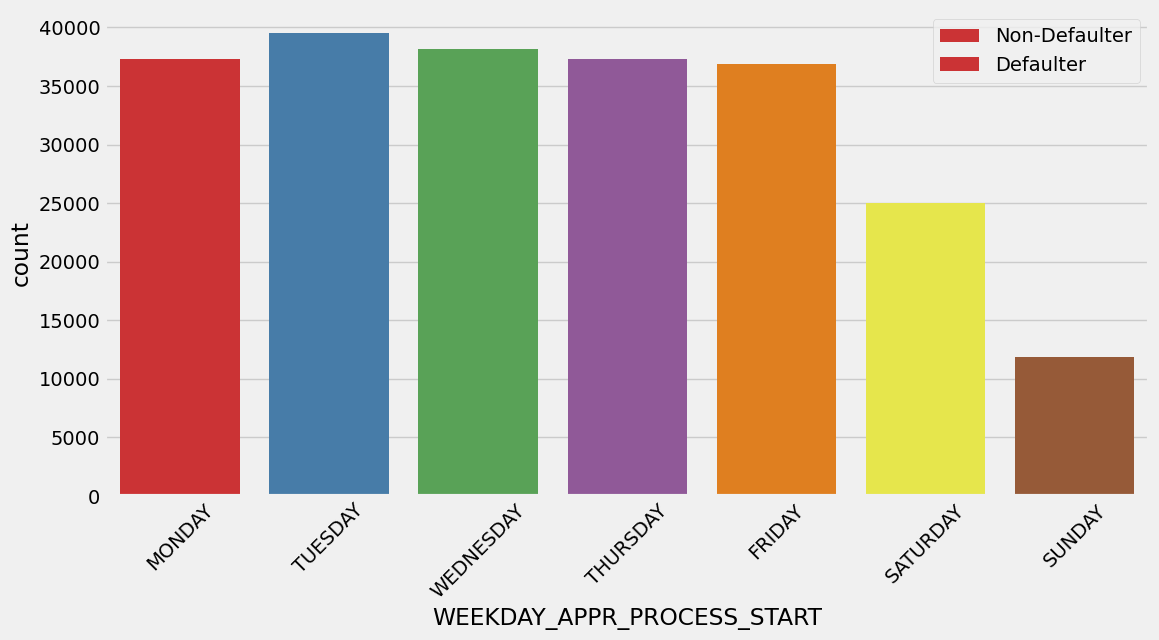

In [34]:
# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=45)

# Order of weekdays
weekday_order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

# Plot for Non-defaulter
sns.countplot(
    x='WEEKDAY_APPR_PROCESS_START',
    data=application_train[application_train["TARGET"] == 0],
    order=weekday_order,
    palette = 'Set1',
    label='Non-Defaulter'
)
ax.tick_params(axis='x', rotation=45)


# Plot for Defaulter
sns.countplot(
    x='WEEKDAY_APPR_PROCESS_START',
    data=application_train[application_train["TARGET"] == 1],
    order=weekday_order,
    palette = 'Set1',
    label='Defaulter'
)
ax.tick_params(axis='x', rotation=45)

ax.legend()
plt.show()

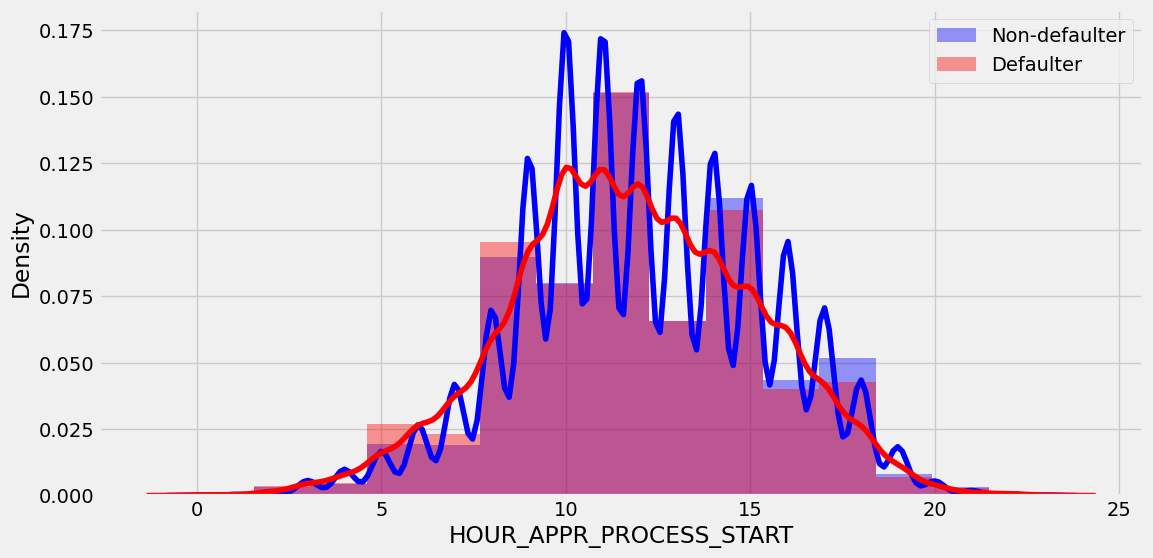

In [35]:
fig, ax = plt.subplots(figsize= (12,6))
sns.distplot(application_train[application_train["TARGET"] == 0]['HOUR_APPR_PROCESS_START'], bins= 15, color='blue', label='Non-defaulter')
sns.distplot(application_train[application_train["TARGET"] == 1]['HOUR_APPR_PROCESS_START'], bins= 15, color='red', label='Defaulter')
ax.legend()
plt.show()

Ngoại trừ Age tất cả feature còn lại distribution giống nhau nên chỉ giữ lại Age

# Contract type

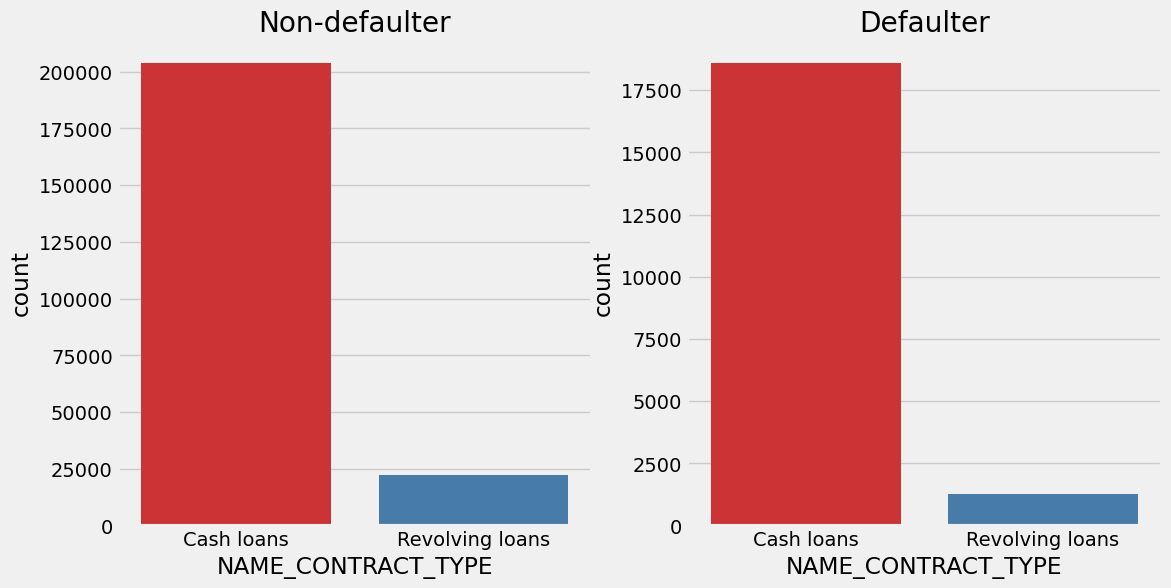

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Non-defaulters: Nhóm không có vấn đề trả nợ
sns.countplot(x='NAME_CONTRACT_TYPE', data=application_train[application_train["TARGET"] == 0], ax=ax[0], palette = 'Set1')
ax[0].set_title("Non-defaulter")

# Defaulters: Nhóm gặp vấn đề trả nợ
sns.countplot(x='NAME_CONTRACT_TYPE', data=application_train[application_train["TARGET"] == 1], ax=ax[1], palette = 'Set1')
ax[1].set_title("Defaulter")

plt.show()


Cash loans có số lượng gấp gần 10 lần Revolving loans

# Income & Annuity

<AxesSubplot:>

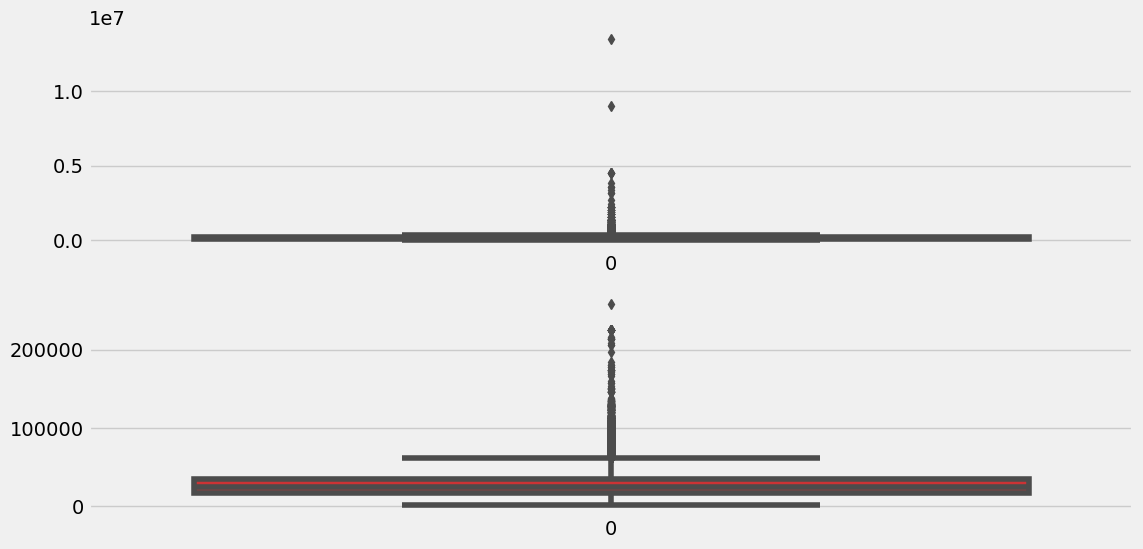

In [37]:
fig, ax = plt.subplots(2,1, figsize= (12,6))
sns.boxplot(application_train['AMT_INCOME_TOTAL'], ax= ax[0], palette = 'Set1')
sns.boxplot(application_train['AMT_ANNUITY'], ax= ax[1], palette = 'Set1')

In [38]:
# Remove outliners 99 percentile
app_train_df = application_train[application_train['AMT_ANNUITY'] < np.nanpercentile(application_train['AMT_ANNUITY'], 99)]
app_train_df = application_train[application_train['AMT_INCOME_TOTAL'] < np.nanpercentile(application_train['AMT_INCOME_TOTAL'], 99)]

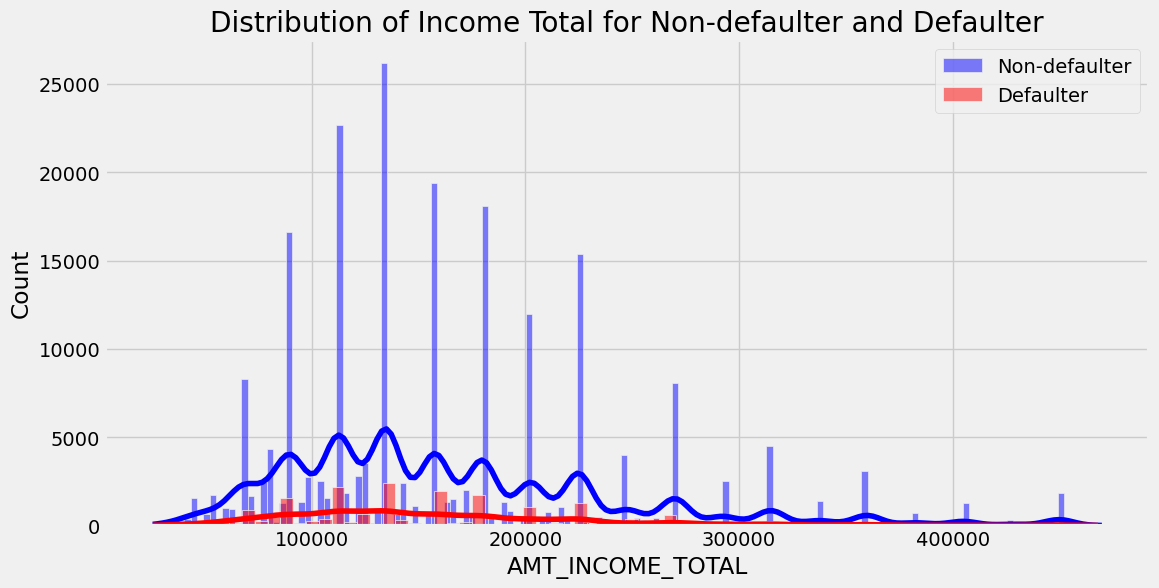

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ non-defaulters với màu xanh
sns.histplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_INCOME_TOTAL'], color='blue', label="Non-defaulter", kde=True, ax=ax)

# Vẽ defaulters với màu đỏ
sns.histplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_INCOME_TOTAL'], color='red', label="Defaulter", kde=True, ax=ax)

# Đặt tiêu đề
ax.set_title("Distribution of Income Total for Non-defaulter and Defaulter")

# Thêm chú thích
ax.legend()

plt.show()


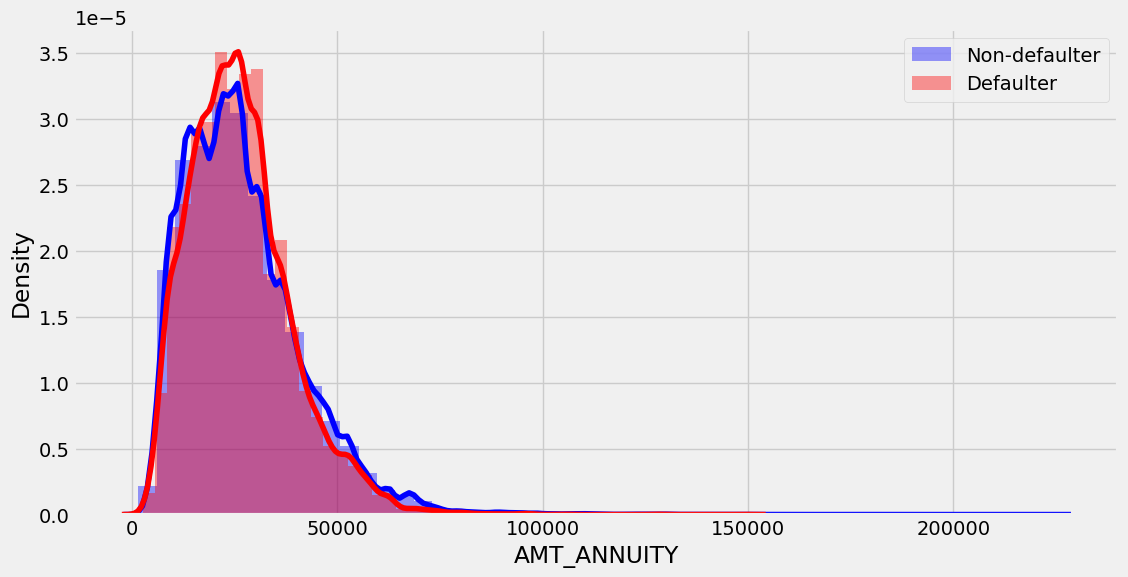

In [40]:
fig, ax = plt.subplots(figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_ANNUITY'], color='blue', label='Non-defaulter')
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_ANNUITY'], color='red', label='Defaulter')
ax.legend()
plt.show()

- Những khách hàng có mức lương Trung bình có xu hướng đăng ký khoản vay (both Defaulters and Non-defaulters).
- Khách hàng có thu nhập trung bình và thấp có nguy cơ vỡ nợ cao.

# Asset details

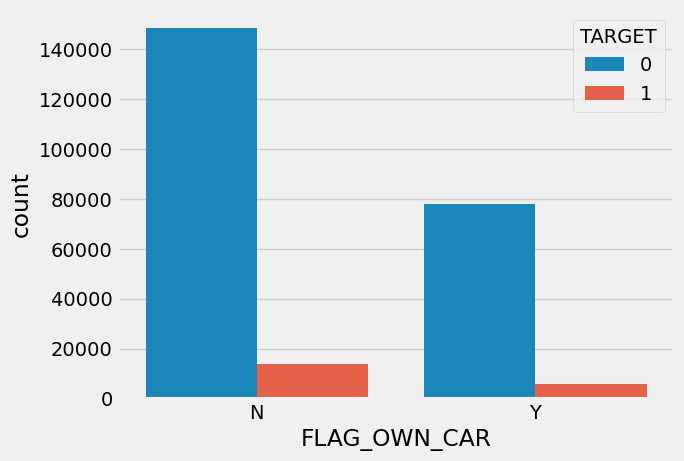

In [41]:
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=application_train)
plt.show()


In [42]:
def defaulter_percentage_count_per_cat(df, col):
    summary = []
    for cat in df[col].unique():
        default_count = df[(df[col] == cat) & (df.TARGET == 1)].shape[0]
        total_count = df[df[col] == cat].shape[0]
        summary.append([cat ,default_count * 100 / total_count])

    report_df = pd.DataFrame(summary)
    report_df.columns = ["Categories", "Percentage_Of_Default"]
    return report_df.sort_values(by='Percentage_Of_Default', ascending=False)
defaulter_percentage_count_per_cat(application_train, 'FLAG_OWN_CAR')

,Categories,Percentage_Of_Default
0,N,8.533517
1,Y,7.200716


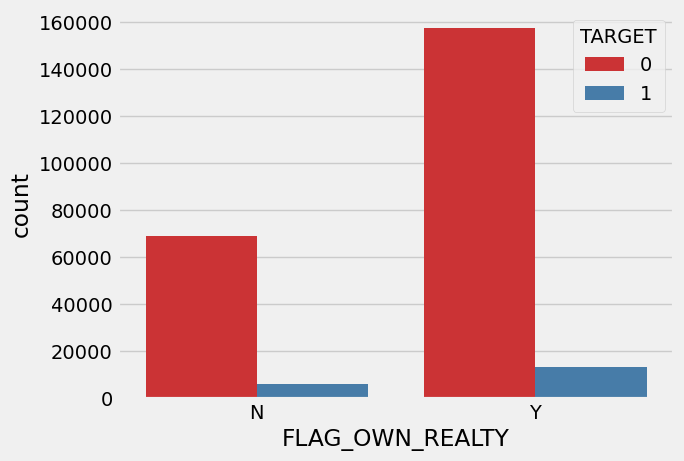

In [43]:
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=application_train, palette = 'Set1')
plt.show()


In [44]:
defaulter_percentage_count_per_cat(application_train, 'FLAG_OWN_REALTY')

,Categories,Percentage_Of_Default
0,N,8.365484
1,Y,7.953501


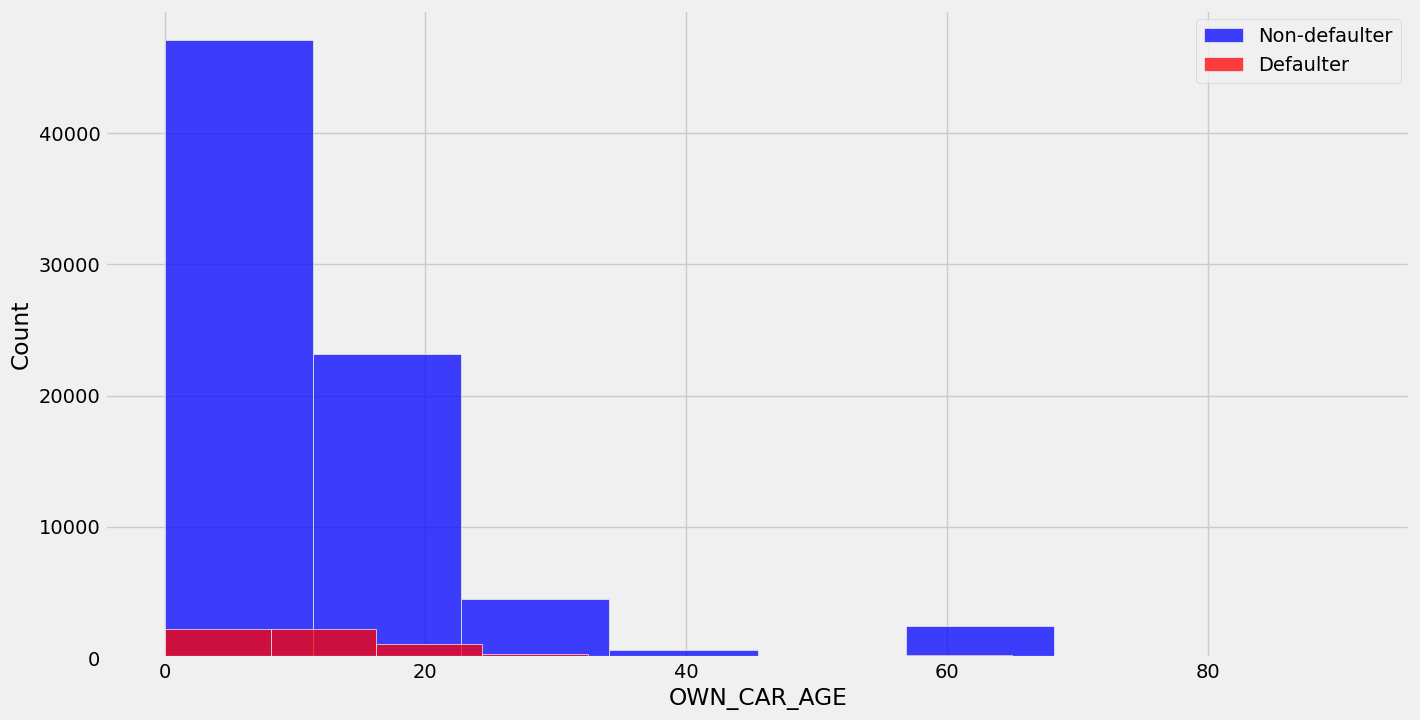

In [45]:
fig, ax = plt.subplots( figsize= (15,8))
sns.histplot(application_train[application_train["TARGET"] == 0]['OWN_CAR_AGE'], bins= 8, color='blue', label='Non-defaulter')
sns.histplot(application_train[application_train["TARGET"] == 1]['OWN_CAR_AGE'], bins= 8, color='red', label='Defaulter')
ax.legend()
plt.show()

Hầu hết khách hàng sở hữu xe và realty. Những khách hàng không sở hữu có tỉ lệ vỡ nợ cao hơn.

Hầu hết tuổi sở hữu xe hơi nằm trong khoảng 0 - 25 và một số ít 60.


Có thể drop các biến ASSET.

# Housing information

In [46]:
start = application_train.columns.get_loc('APARTMENTS_AVG')
end = application_train.columns.get_loc('EMERGENCYSTATE_MODE')

housing_df = application_train.iloc[:, start : end+1]
housing_df['TARGET'] = application_train["TARGET"]
housing_df['NAME_HOUSING_TYPE'] = application_train["NAME_HOUSING_TYPE"]

In [47]:
check_missed_values(housing_df)

,Feature,Percentage
0,COMMONAREA_MEDI,69.887687
1,COMMONAREA_AVG,69.887687
2,COMMONAREA_MODE,69.887687
3,NONLIVINGAPARTMENTS_MODE,69.456402
4,NONLIVINGAPARTMENTS_MEDI,69.456402
5,NONLIVINGAPARTMENTS_AVG,69.456402
6,FONDKAPREMONT_MODE,68.406847
7,LIVINGAPARTMENTS_MEDI,68.370263
8,LIVINGAPARTMENTS_MODE,68.370263
9,LIVINGAPARTMENTS_AVG,68.370263


Hầu hết các cột bị null -> Có thể drop các cột Housing Information

# Social

In [48]:
social_df = application_train[["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]]

<AxesSubplot:>

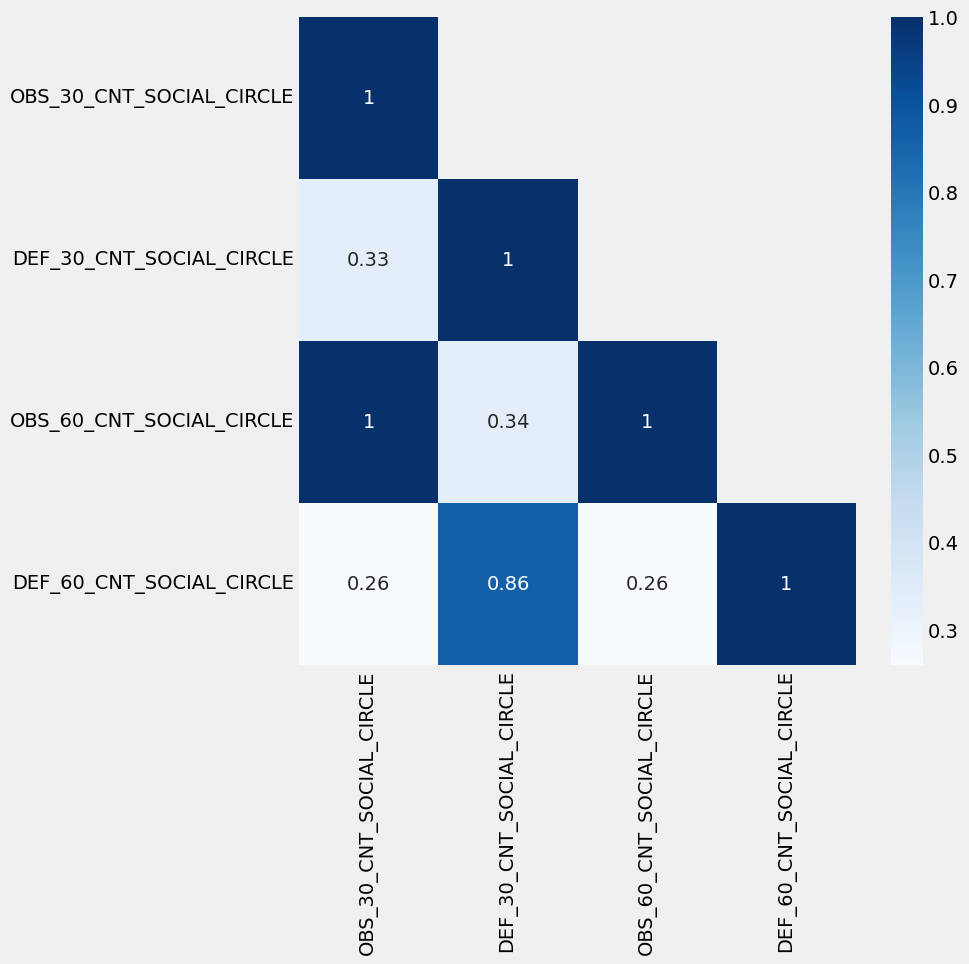

In [49]:
mask = np.zeros_like(social_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(8,8))
sns.heatmap(social_df.corr(), annot=True, mask= mask, cmap= "Blues")

- OBS_60_CNT_SOCIAL_CIRCLE và OBS_30_CNT_SOCIAL_CIRCLE là 2 cột giống hệt nhau. 
- DEF_30_CNT_SOCIAL_CIRCLE và DEF_60_CNT_SOCIAL_CIRCLE có hệ số tương quan cao.

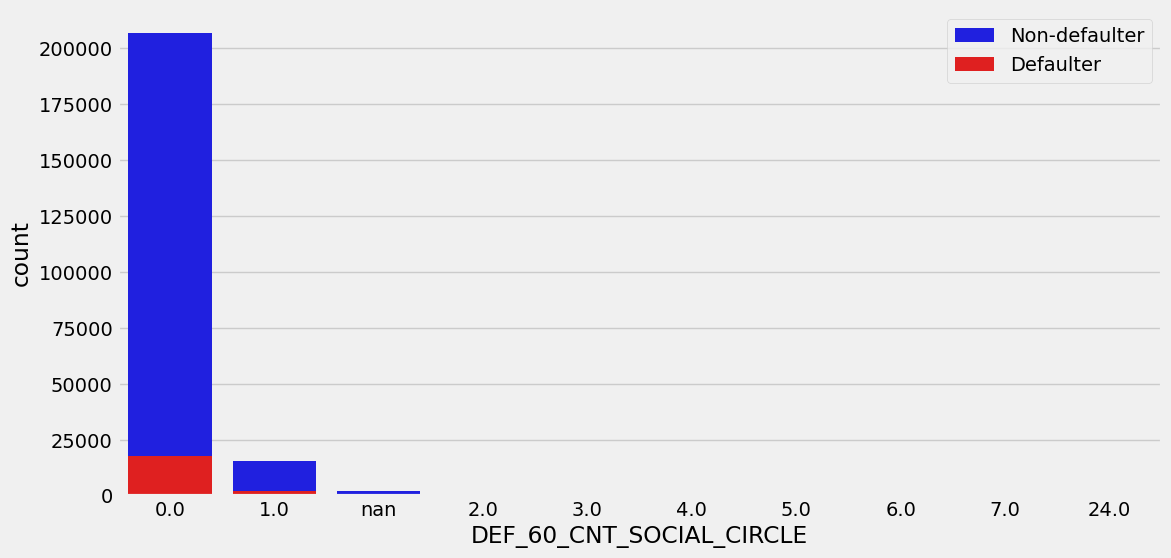

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))

# Trực quan hóa số lượng giá trị trong biến "DEF_60_CNT_SOCIAL_CIRCLE" của nhóm khách hàng không có vấn đề trả nợ (Non-defaulter)
sns.countplot(x='DEF_60_CNT_SOCIAL_CIRCLE', data=application_train[application_train["TARGET"] == 0], color='blue', label='Non-defaulter')

# Trực quan hóa số lượng giá trị trong biến "DEF_60_CNT_SOCIAL_CIRCLE" của nhóm khách hàng có vấn đề trả nợ (Defaulter)
sns.countplot(x='DEF_60_CNT_SOCIAL_CIRCLE', data=application_train[application_train["TARGET"] == 1], order=sorted(application_train['DEF_60_CNT_SOCIAL_CIRCLE'].unique()), color='red', label='Defaulter')

ax.legend()
plt.show()


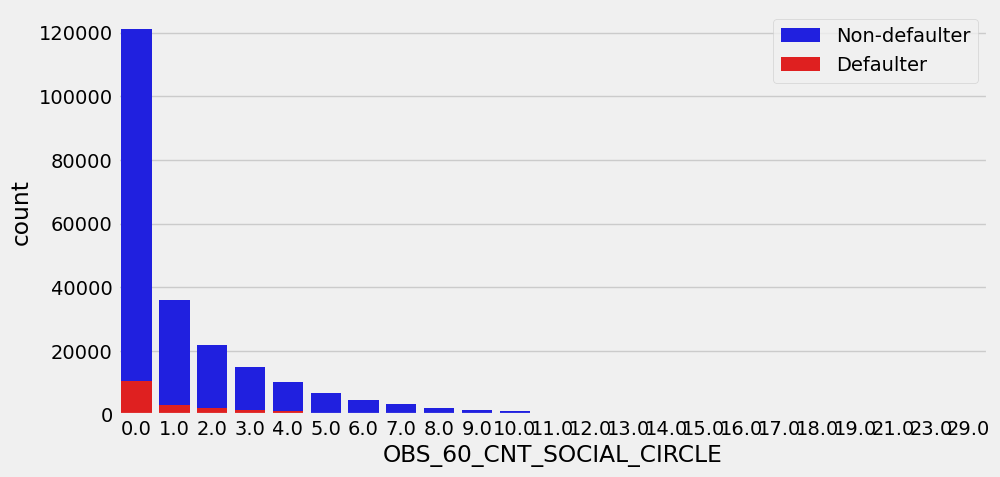

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

# Trực quan hóa số lượng giá trị trong biến "OBS_60_CNT_SOCIAL_CIRCLE" của nhóm khách hàng không có vấn đề trả nợ (Non-defaulter)
sns.countplot(data=application_train[application_train["TARGET"] == 0], x='OBS_60_CNT_SOCIAL_CIRCLE', color='blue', label='Non-defaulter')

# Trực quan hóa số lượng giá trị trong biến "OBS_60_CNT_SOCIAL_CIRCLE" của nhóm khách hàng có vấn đề trả nợ (Defaulter)
sns.countplot(data=application_train[application_train["TARGET"] == 1], x='OBS_60_CNT_SOCIAL_CIRCLE', color='red', label='Defaulter')

ax.legend()
plt.show()


Hai feature còn lại cũng có trend giống nhau trong cả 2 trường hợp của biến Target -> Có thể bỏ tất cả các biến Social Info.

# Region info

<AxesSubplot:>

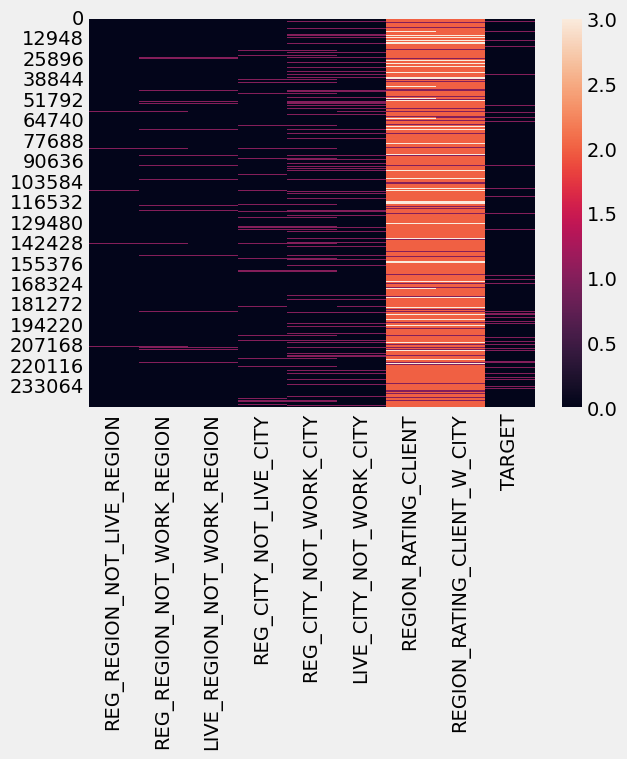

In [52]:
start = application_train.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end = application_train.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_train.iloc[:, start : end+1]
region_df['REGION_RATING_CLIENT'] = application_train['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_train['REGION_RATING_CLIENT_W_CITY']
region_df['TARGET'] = application_train['TARGET']

sns.heatmap(region_df)

- REG_REGION_NOT_LIVE_REGION chứa hầu hết các giá trị 0 có thể drop
- REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION gần giống nhau có thể loại 1 trong 2
- REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns gần giống nhau có thể loại 1 trong 2

-> Giữ các cột REG_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REGION_POPULATION_RELATIVE

In [53]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14))

    sns.set_color_codes("pastel")
    
    # Plot subplot 1
    s1 = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1)
    if label_rotation:
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
    
    # Plot subplot 2
    s2 = sns.barplot(ax=ax2, x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if label_rotation:
        s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
    
    # Ensure both subplots use the same tick positions and labels
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels(ax1.get_xticklabels())

    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()


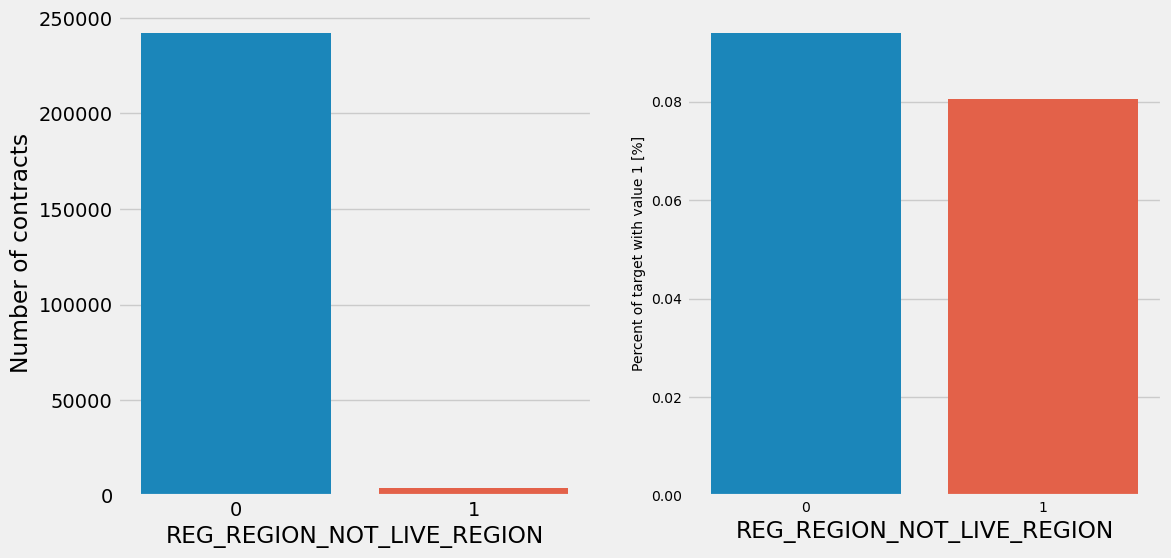

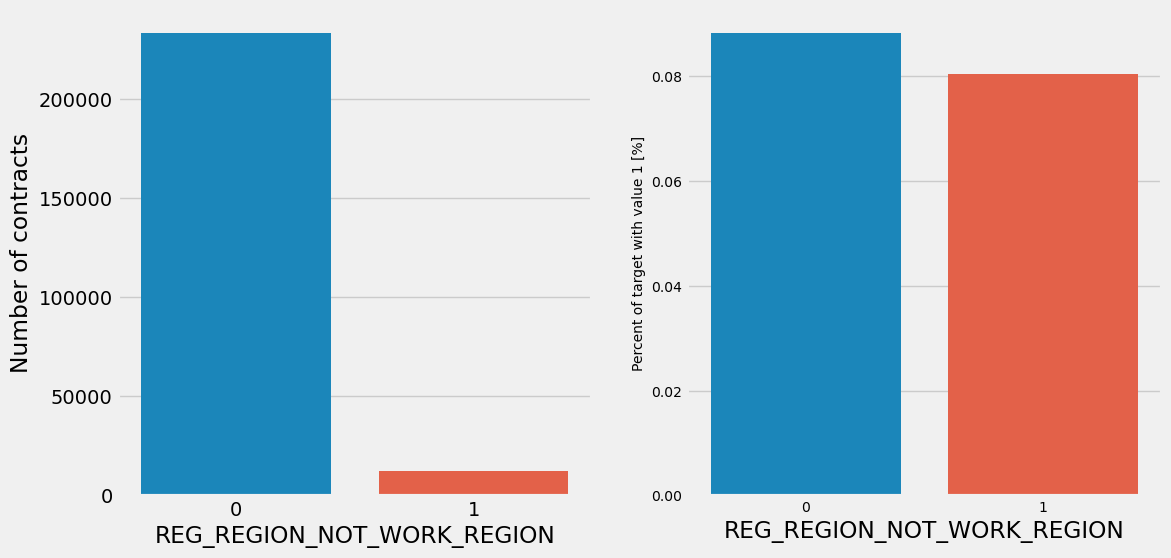

In [54]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Rất ít người được đăng ký trong khu vực không sinh sống hoặc không làm việc. Tỷ lệ không repaid đối với những trường hợp này lớn hơn một chút so với những trường hợp còn lại (trên 8% một chút so với khoảng 8%)

Có nhiều người đăng ký tại thành phố họ sống hoặc làm việc hơn (một số lượng lớn đăng ký ở thành phố làm việc khác với thành phố đang sống).

Những người đăng ký ở thành phố khác với thành phố đang làm việc hoặc sinh sống (8%) thường không trả được khoản vay hơn những người đăng ký cùng thành phố.

# Contact Info

<AxesSubplot:>

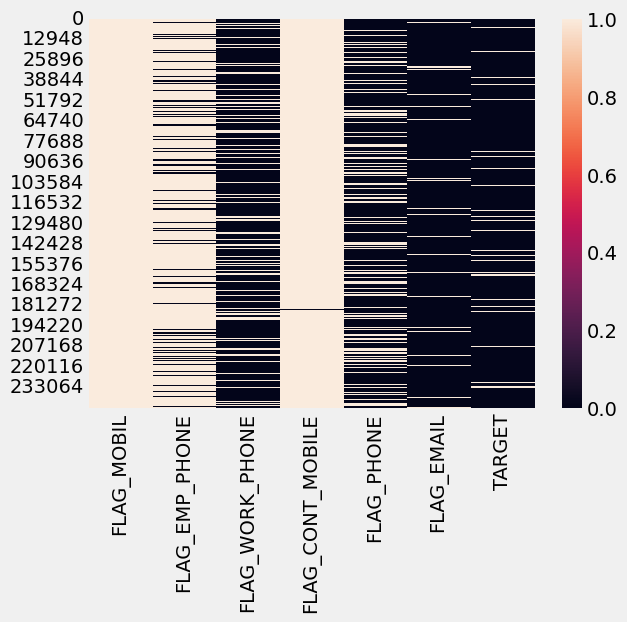

In [55]:
contact_df = application_train[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))

# Family info

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

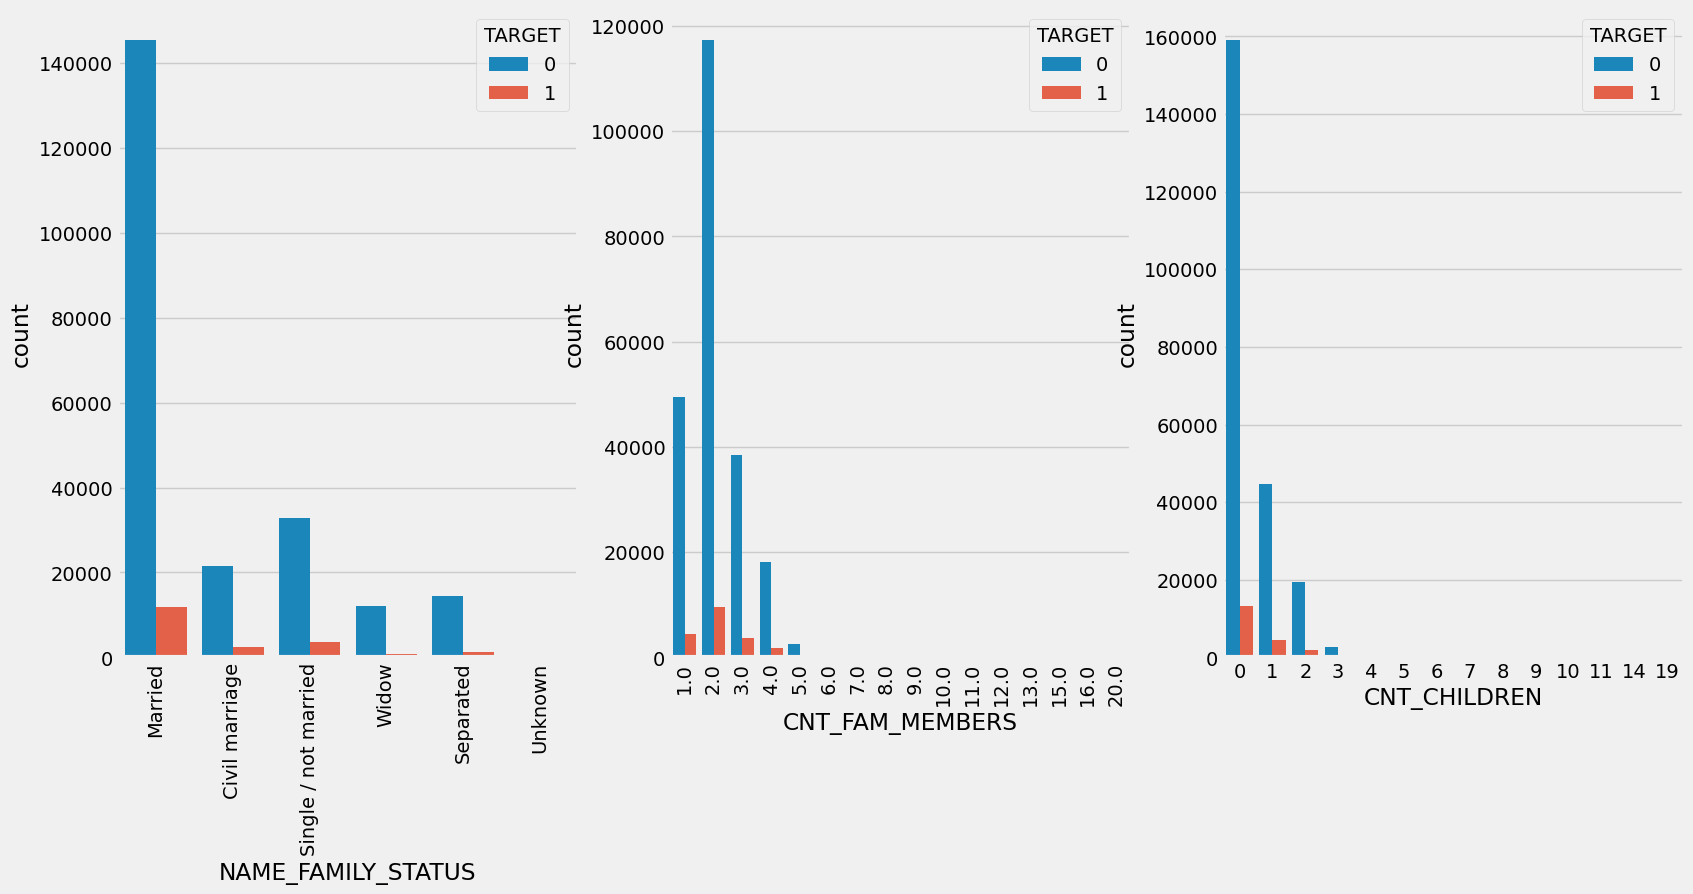

In [56]:
fig, ax = plt.subplots(1,3, figsize= (18,8))
sns.countplot(x=application_train['NAME_FAMILY_STATUS'], hue=application_train['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 90)
sns.countplot(x=application_train['CNT_FAM_MEMBERS'], hue=application_train['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 90)
sns.countplot(x=application_train['CNT_CHILDREN'], hue=application_train['TARGET'], ax= ax[2])

- Xét về tỷ lệ không trả được nợ, Hôn nhân dân sự có tỷ lệ không trả được cao nhất (10%), với Widow là thấp nhất
- Đối với khách hàng có 9 hoặc 11 con, tỷ lệ khoản vay không được hoàn trả là 100%.
- Khách hàng có thành viên gia đình gồm 2 người là nhiều nhất, tiếp theo là 1 (người độc thân), 3 (gia đình có một con) và 4. Tuy nhiên số lượng ngày càng ít khi số thành viên tăng lên.

=> Giữ CNT_FAM_MEMBERS và CNT_CHILDREN vì tuy distribution giống nhau nhưng 2 (CNT_FAM_MEMBERS) và 0 (CNT_CHILDREN) chiếm số lượng lớn

In [57]:
nbr_fam_mem = application_train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).count()
nbr_fam_mem

,CNT_FAM_MEMBERS,TARGET
0,1.0,54069
1,2.0,126956
2,3.0,42092
3,4.0,19752
4,5.0,2733
5,6.0,310
6,7.0,63
7,8.0,18
8,9.0,4
9,10.0,2


Text(0.5, 0, 'Number')

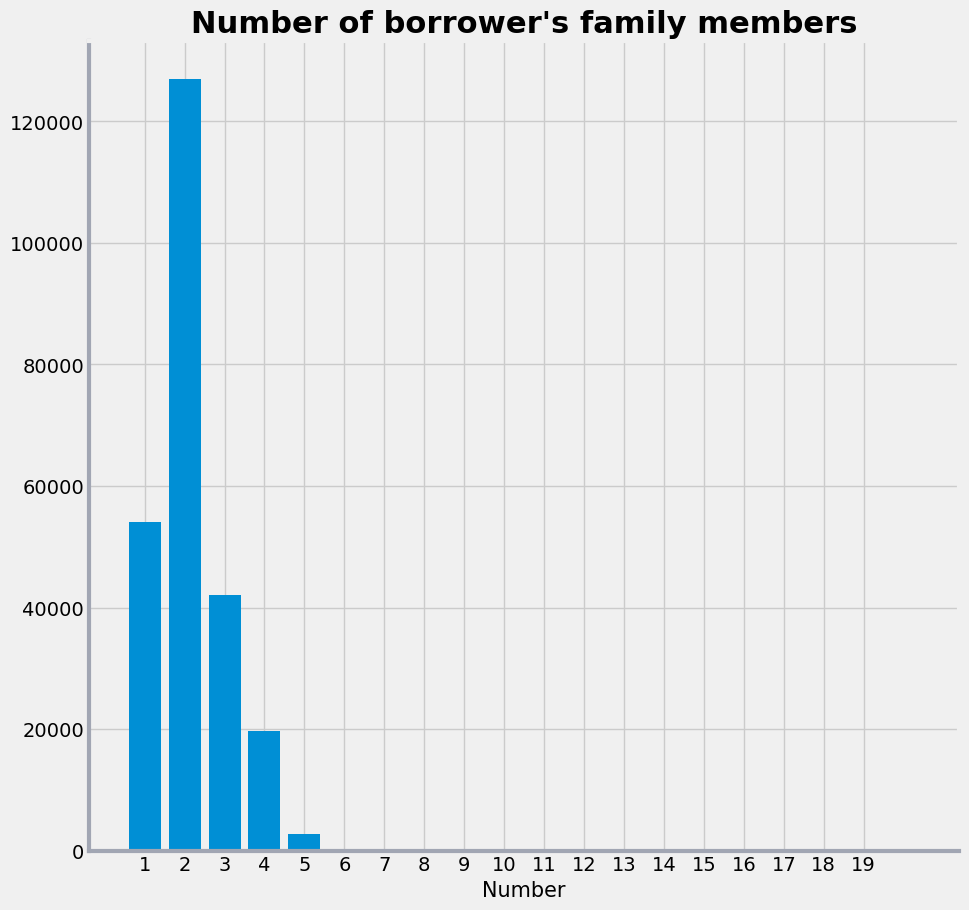

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))


ax.bar(nbr_fam_mem['CNT_FAM_MEMBERS'], nbr_fam_mem['TARGET'])
ax.spines[['top', "right", 'left']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(np.arange(1, 20,1))

ax.set_xlabel('Number', size = "15")
ax.set_title("Number of borrower's family members", weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")

In [59]:
# Tỉ lệ không trả được nợ 
perc_fam_mem = application_train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).mean()

Text(0.5, 0, 'Number')

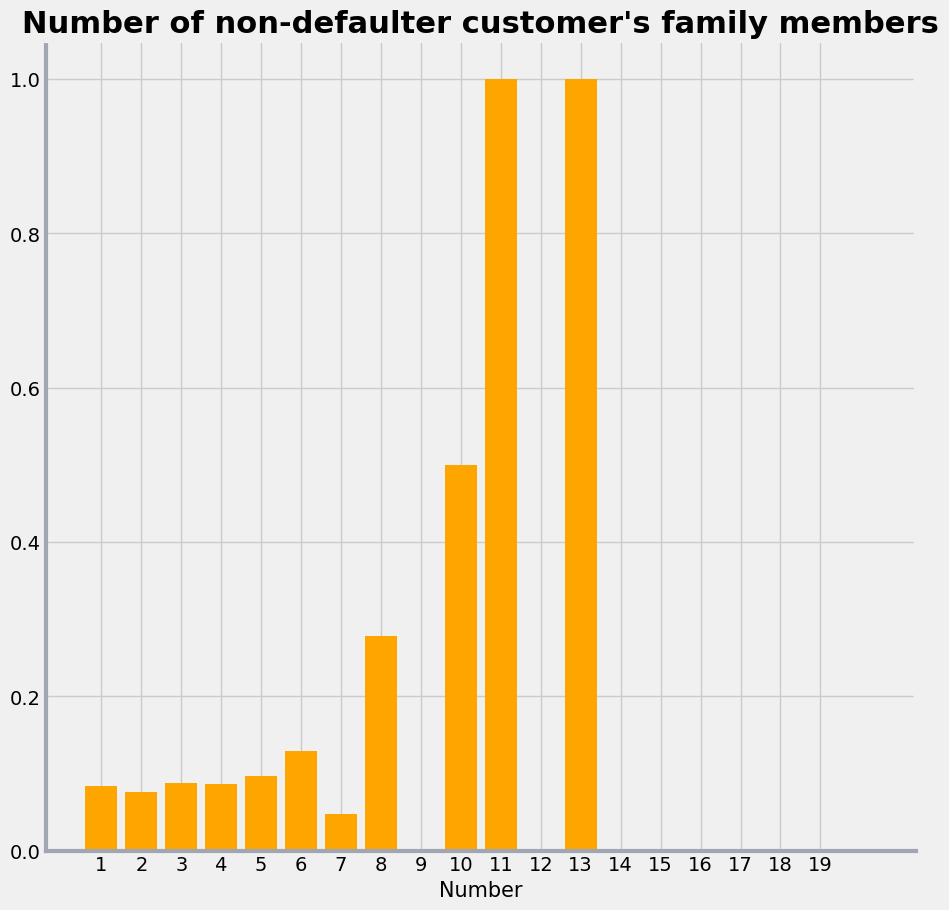

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(perc_fam_mem['CNT_FAM_MEMBERS'], perc_fam_mem['TARGET'],color ='orange')
ax.spines[['top', "right", 'left']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(np.arange(1, 20,1))

ax.set_xlabel('Number', size = "15")
ax.set_title("Number of non-defaulter customer's family members", weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")

# Education and Occupation info

[Text(0, 0, 'Core staff'),
 Text(1, 0, 'Laborers'),
 Text(2, 0, 'Managers'),
 Text(3, 0, 'Drivers'),
 Text(4, 0, 'Sales staff'),
 Text(5, 0, 'Cleaning staff'),
 Text(6, 0, 'Private service staff'),
 Text(7, 0, 'Medicine staff'),
 Text(8, 0, 'Security staff'),
 Text(9, 0, 'Accountants'),
 Text(10, 0, 'Cooking staff'),
 Text(11, 0, 'High skill tech staff'),
 Text(12, 0, 'Low-skill Laborers'),
 Text(13, 0, 'Realty agents'),
 Text(14, 0, 'Secretaries'),
 Text(15, 0, 'Waiters/barmen staff'),
 Text(16, 0, 'IT staff'),
 Text(17, 0, 'HR staff')]

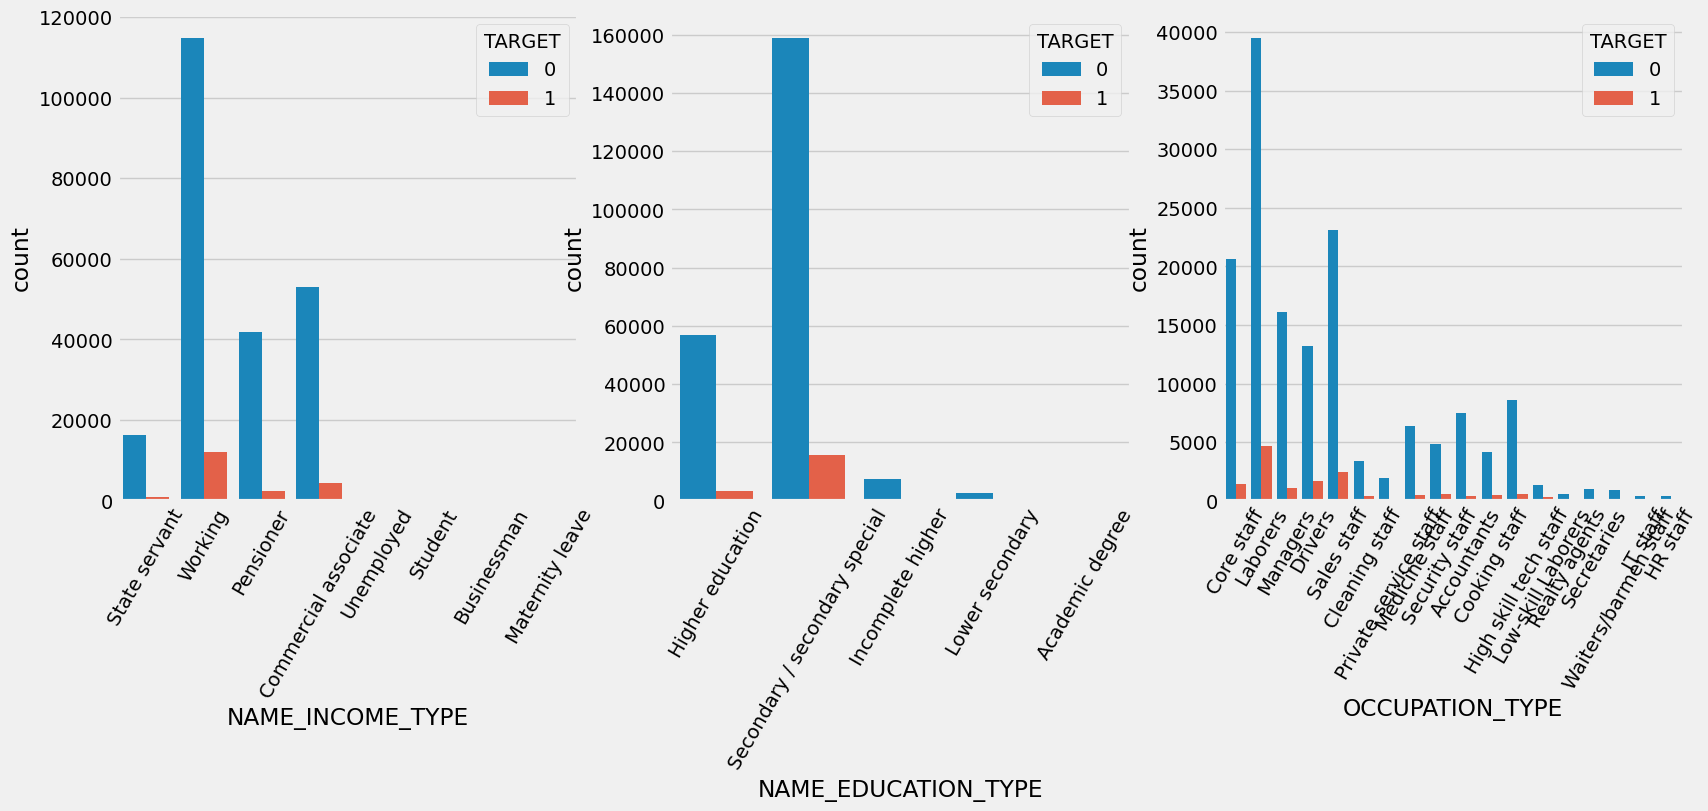

In [61]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(x=application_train['NAME_INCOME_TYPE'], hue=application_train['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(x=application_train['NAME_EDUCATION_TYPE'], hue=application_train['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(x=application_train['OCCUPATION_TYPE'], hue=application_train['TARGET'], ax= ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation= 60)

- Phần lớn khoản vay được thực hiện bởi Người lao động, tiếp theo là Nhân viên Kinh doanh. Nhân viên CNTT nhận số tiền vay thấp nhất.
- Nhóm có tỷ lệ nợ không hoàn trả cao nhất là Lao động tay nghề thấp (trên 17%), tiếp theo là Lái xe và Nhân viên phục vụ/barmen, Nhân viên bảo vệ, Lao công và Nhân viên nấu ăn.
- Hầu hết người đăng ký vay đều có thu nhập từ Đi làm, tiếp theo là Cộng tác viên Thương mại, Người nghỉ hưu và Công chức Nhà nước.

=> 3 biến này có thể được giữ lại

Khách hàng có số lượng thành viên trong gia đình gồm 2 người là nhiều nhất, tiếp theo là 1 (người độc thân), 3 (gia đình có một con) và 4. Tuy nhiên số lượng khách hàng tỉ lệ nghịch với số thành viên trong gia đình.

Có 2 khách hàng có quy mô gia đình là 11 và 13, cả 2 người đấy đều không trả được nợ nên tỷ lệ không trả nợ là 100%. Các gia đình khác có 10 hoặc 8 thành viên có tỷ lệ không trả được nợ trên 30%. Các gia đình có 6 thành viên trở xuống có tỷ lệ trả nợ gần mức trung bình 10%.

In [62]:
application_train[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE
0,School,State servant
1,Business Entity Type 3,Working
2,Religion,Working
3,Other,State servant
4,Other,State servant
5,XNA,Pensioner
6,Electricity,Working
7,Medicine,Working
8,Self-employed,Working
9,Transport: type 2,Working


NAME_INCOME_TYPE == Pensioner <-> ORGANIZATON_TYPE == null

=> Xem số lượng Pensioner -> Quyết định có áp dụng giá trị rỗng của ORGANIZATION_TYPE với Pensioner hay không.

In [63]:
application_train.NAME_INCOME_TYPE.value_counts()    # Check the counts for each in NAME_INCOME_TYPE

Working                 126930
Commercial associate     57339
Pensioner                44314
State servant            17381
Unemployed                  19
Student                     15
Businessman                  9
Maternity leave              2
Name: NAME_INCOME_TYPE, dtype: int64

KL: Giá trị Pensioner xấp xỉ bằng giá trị rỗng trong cột ORGANIZATION_TYPE. Vì vậy, giá trị bị thiếu ở mức nào đó.
Tương tự như vậy việc áp giá trị rỗng của OCCUPATION_TYPE với Pensioner vì hầu hết các giá trị rỗng cho OCCUPATION_TYPE so với giá trị biến loại Income, ta nhận thấy rằng “Pensioner” là giá trị thường xuyên nhất, gần như 80% giá trị rỗng của OCCUPATION_TYPE

In [64]:
nbr_icome_type = application_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).count()
nbr_icome_type

,NAME_INCOME_TYPE,TARGET
0,Businessman,9
1,Commercial associate,57339
2,Maternity leave,2
3,Pensioner,44314
4,State servant,17381
5,Student,15
6,Unemployed,19
7,Working,126930


<AxesSubplot:title={'center':"Borrowers' income sources in number"}, xlabel='Number'>

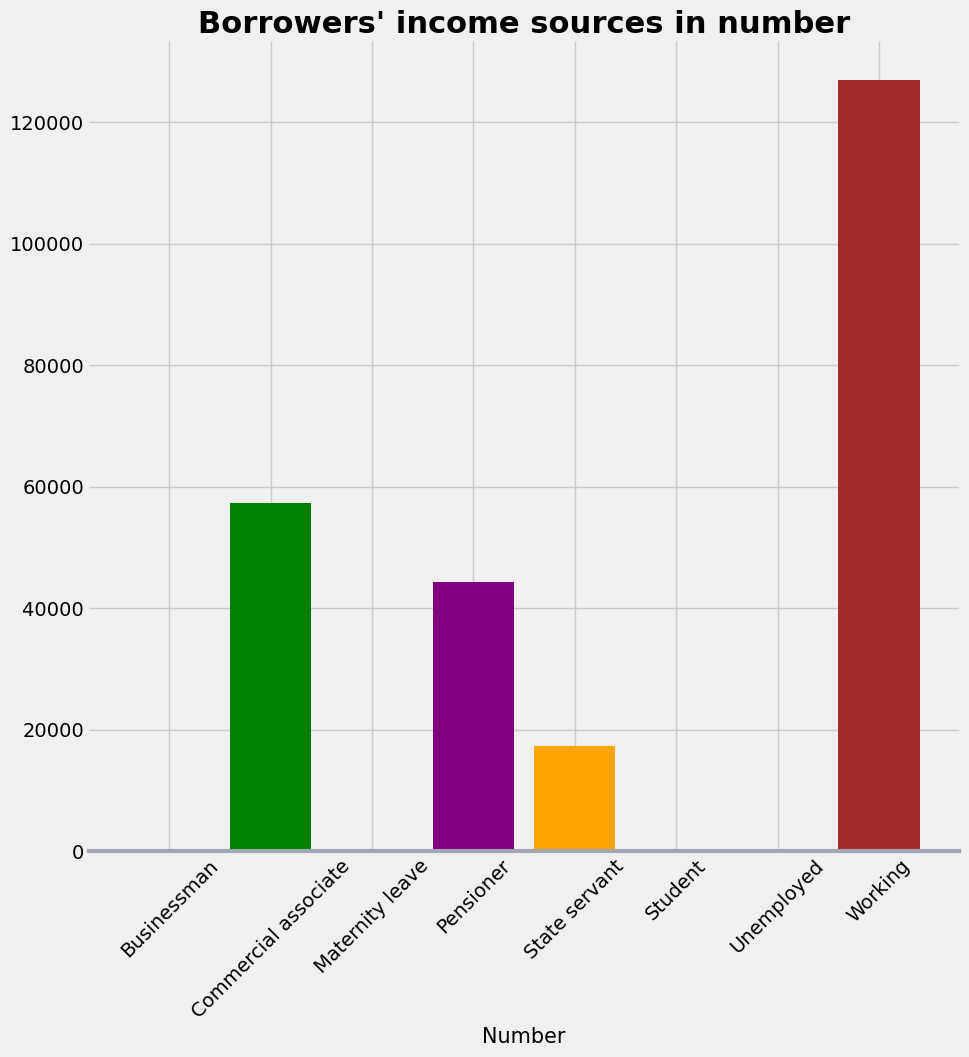

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'pink', 'brown']

ax.bar(nbr_icome_type['NAME_INCOME_TYPE'], nbr_icome_type['TARGET'],color=colors)
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')

ax.set_xlabel('Number', size = "15")
ax.set_title("Borrowers' income sources in number", weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")

plt.xticks(rotation=45)
ax

Hầu hết những người nộp đơn cho khoản vay là thu nhập từ Working, tiếp theo là Commercial asscociate, Pensioner và State servant.

In [66]:
perc_income_type = application_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

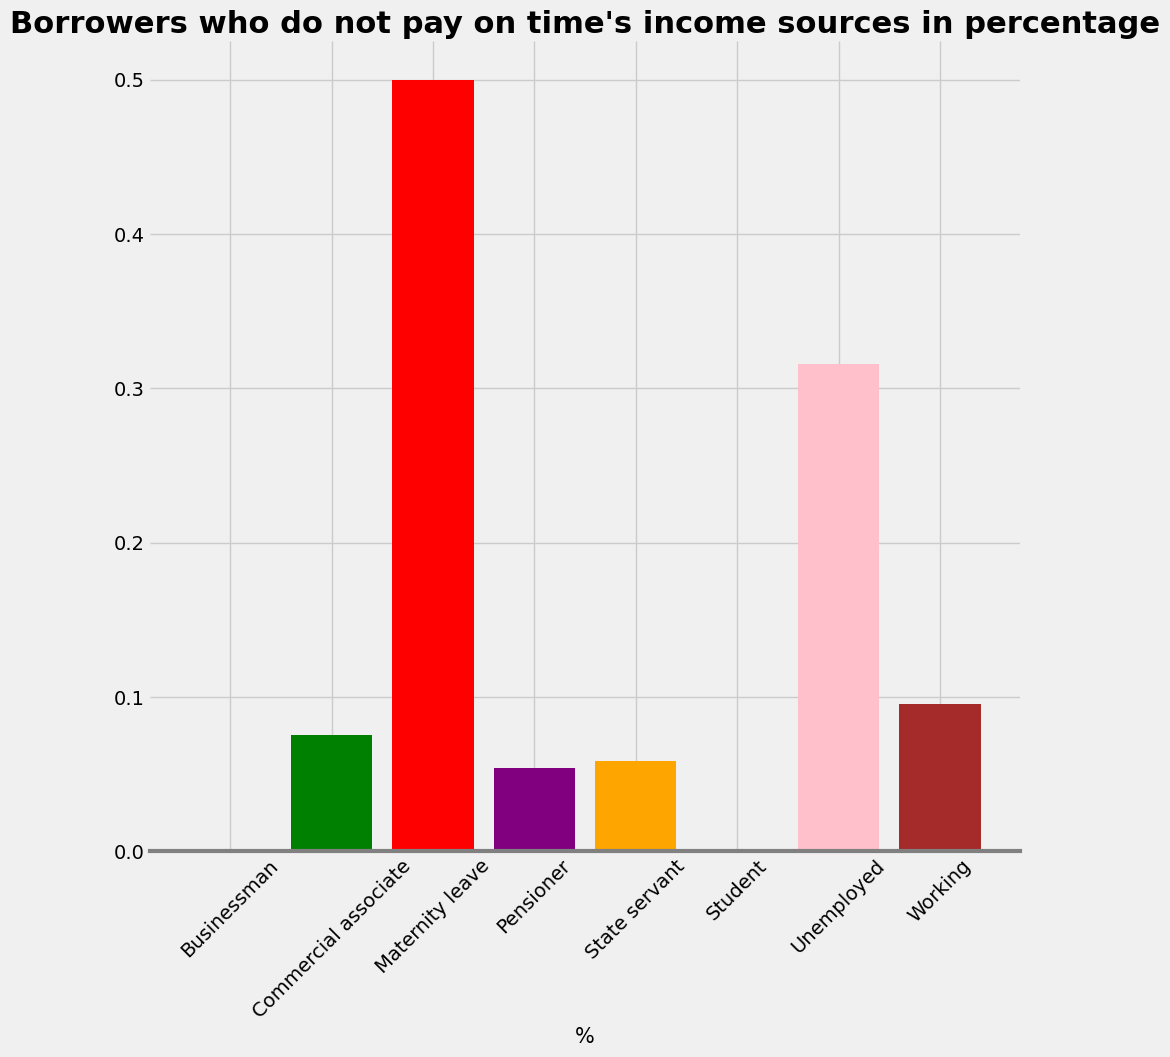

In [67]:
ig, ax = plt.subplots(figsize=(10, 10))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'pink', 'brown']

ax.bar(perc_income_type['NAME_INCOME_TYPE'], perc_income_type['TARGET'],color=colors)
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')



ax.set_title("Borrowers who do not pay on time's income sources in percentage", weight = 'bold', size="22")
ax.set_xlabel('%', size = "15")

plt.xticks(rotation=45)



Những người nộp đơn với loại thu nhập Nghỉ thai sản có tỷ lệ không trả lại khoản vay là 50%, tiếp theo là Thất nghiệp (32%). Các loại thu nhập còn lại đều ở mức trung bình dưới 10% do không trả lại các khoản cho vay.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Core staff'),
  Text(1, 0, 'Laborers'),
  Text(2, 0, 'Managers'),
  Text(3, 0, 'Drivers'),
  Text(4, 0, 'Sales staff'),
  Text(5, 0, 'Cleaning staff'),
  Text(6, 0, 'Private service staff'),
  Text(7, 0, 'Medicine staff'),
  Text(8, 0, 'Security staff'),
  Text(9, 0, 'Accountants'),
  Text(10, 0, 'Cooking staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Low-skill Laborers'),
  Text(13, 0, 'Realty agents'),
  Text(14, 0, 'Secretaries'),
  Text(15, 0, 'Waiters/barmen staff'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

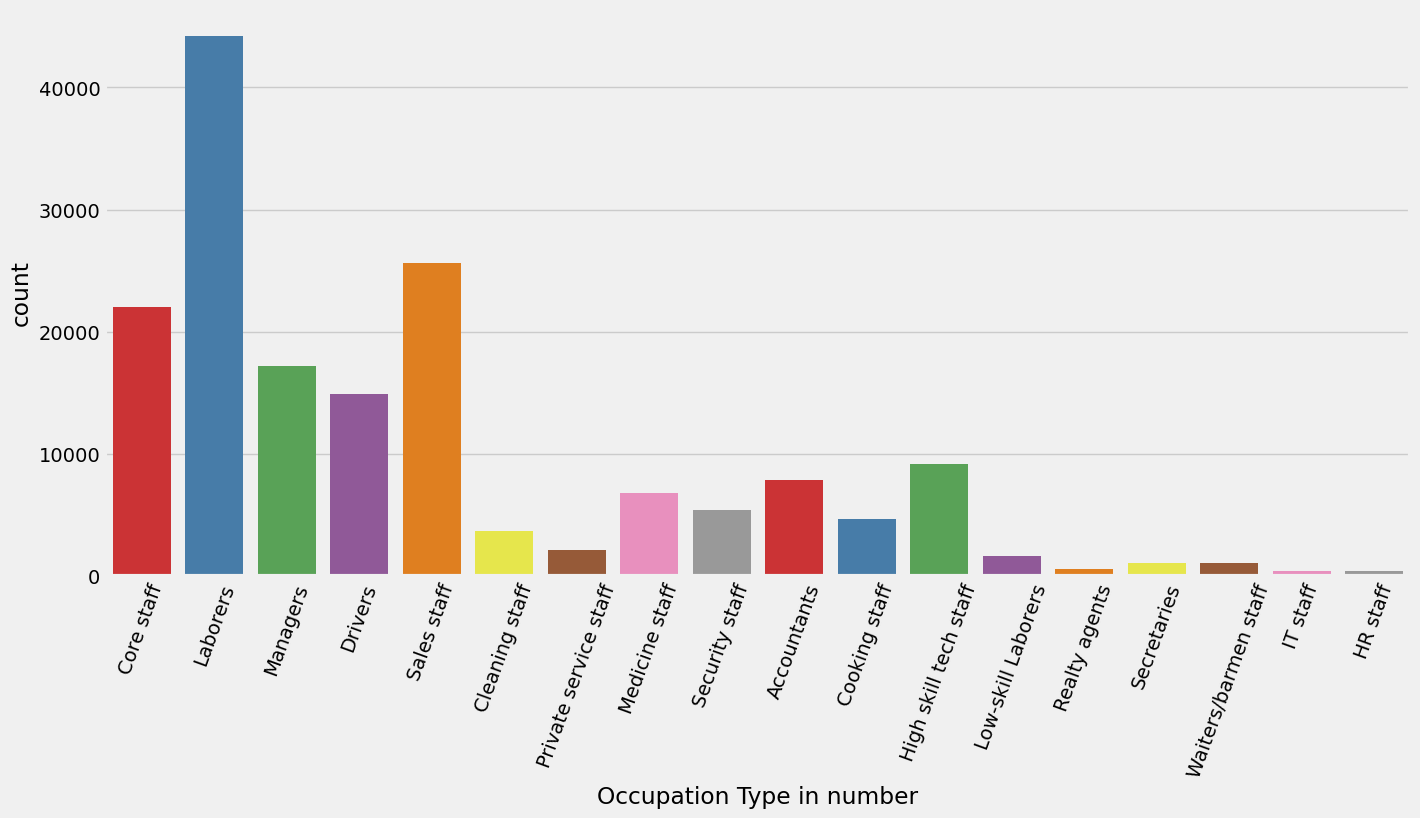

In [68]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=application_train, palette = 'Set1')
plt.xlabel("Occupation Type in number")
plt.xticks(rotation=70)

Hầu hết người đi vay là người lao động và ít nhất là Nhân viên IT và Nhân viên HR

In [69]:
perc_occupation_type = application_train[['OCCUPATION_TYPE', 'TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean()

Text(0.5, 0, '%')

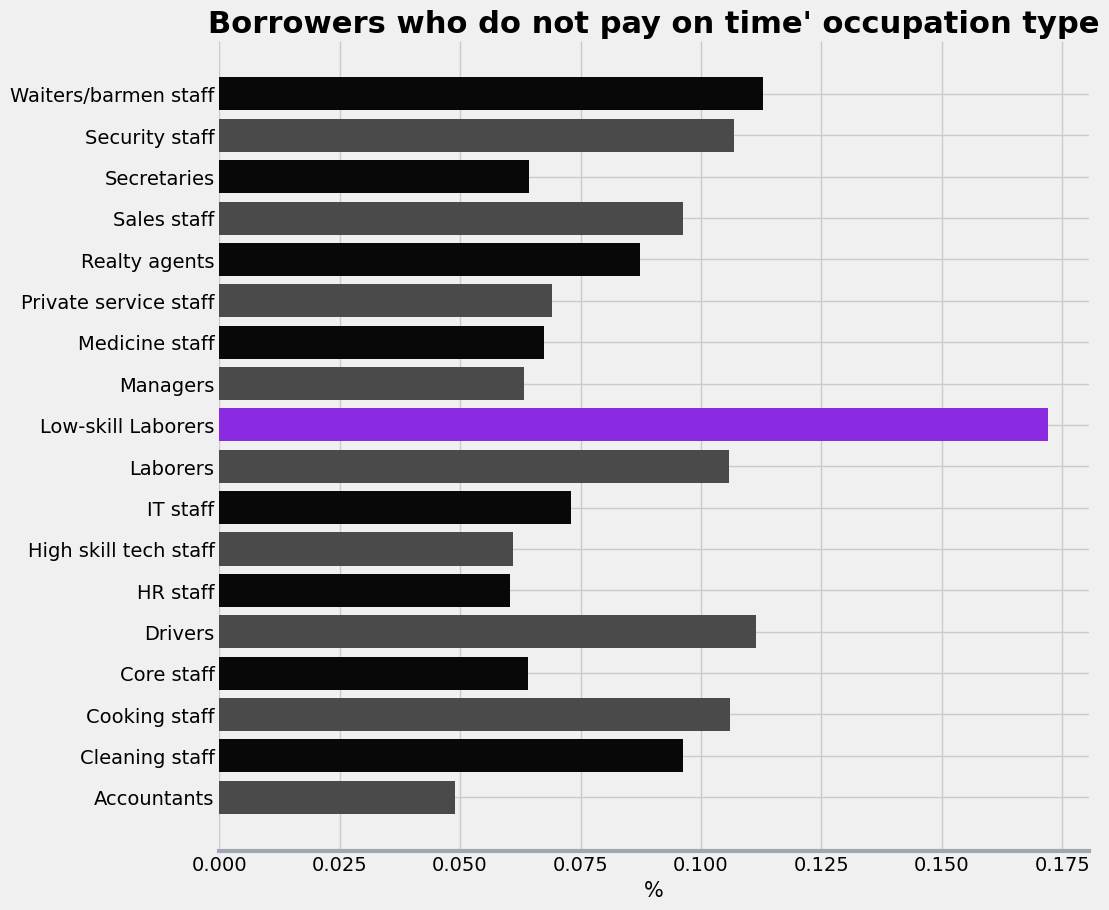

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ['#4A4A4A', "#080808"]*9
color[9] = "#8A2BE2"

ax.barh(perc_occupation_type['OCCUPATION_TYPE'], perc_occupation_type['TARGET'],color =color)
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')



ax.set_title("Borrowers who do not pay on time' occupation type", weight = 'bold', size="22")
ax.set_xlabel('%', size = '15')

Nhóm có tỷ lệ khoản vay không được hoàn trả cao nhất là Lao động trình độ thấp (khoảng 17%), tiếp theo là Lái xe và Nhân viên phục vụ/barmen, Nhân viên bảo vệ, Nhân viên lao động và Nhân viên nấu ăn.

Text(0, 0.5, 'Average Annual family income')

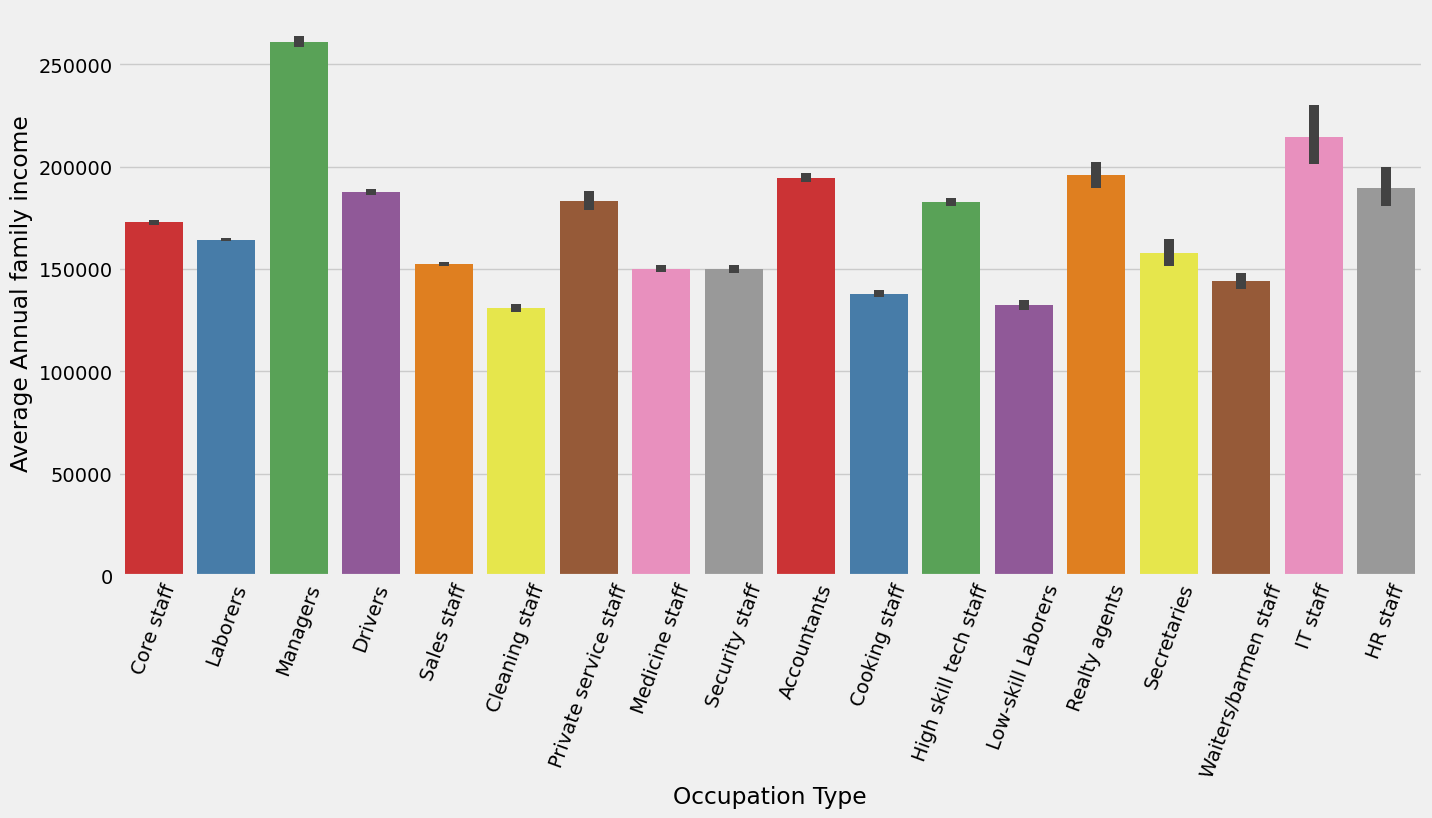

In [71]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=application_train, palette = 'Set1')
plt.xticks(rotation=70)
plt.xlabel('Occupation Type')
plt.ylabel('Average Annual family income')

Dựa trên thu nhập hàng năm của gia đình, manager là người đi vay kiếm được nhiều tiền nhất trong khi nhân viên dọn vệ sinh là người đi vay và kiếm được tiền ít nhất.

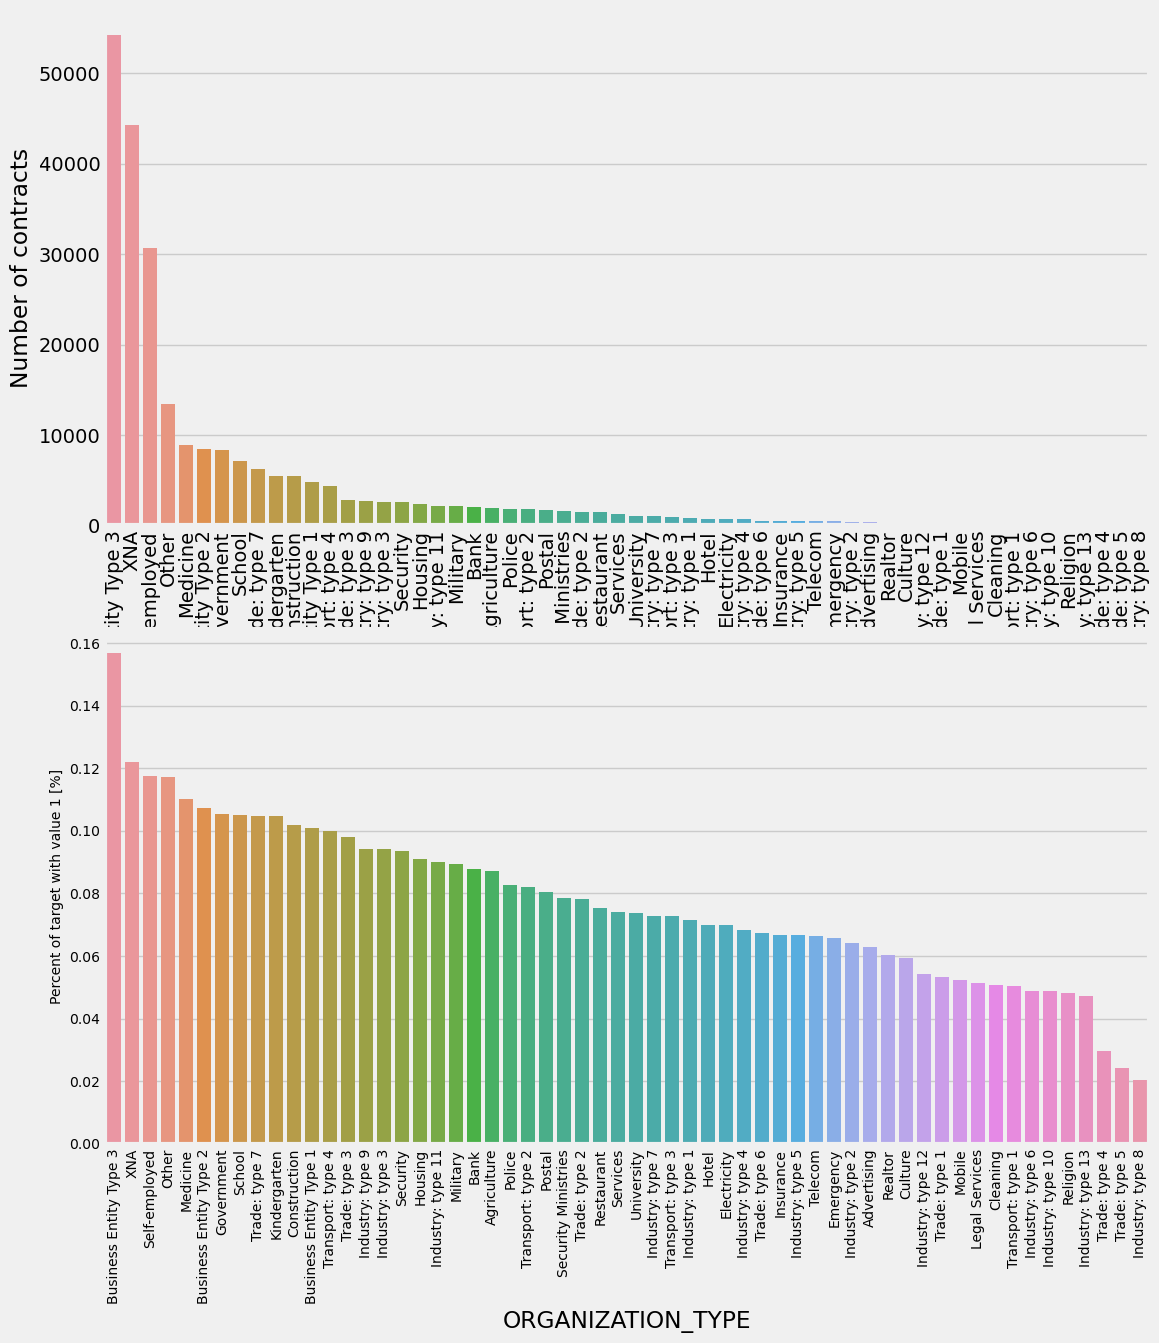

In [72]:
plot_stats('ORGANIZATION_TYPE',True, False)

Các tổ chức có tỷ lệ nợ không hoàn trả cao nhất là Transport: type 3 (15,5%), Restaurant (12,5%) và Industry: type 1 (11,5%).

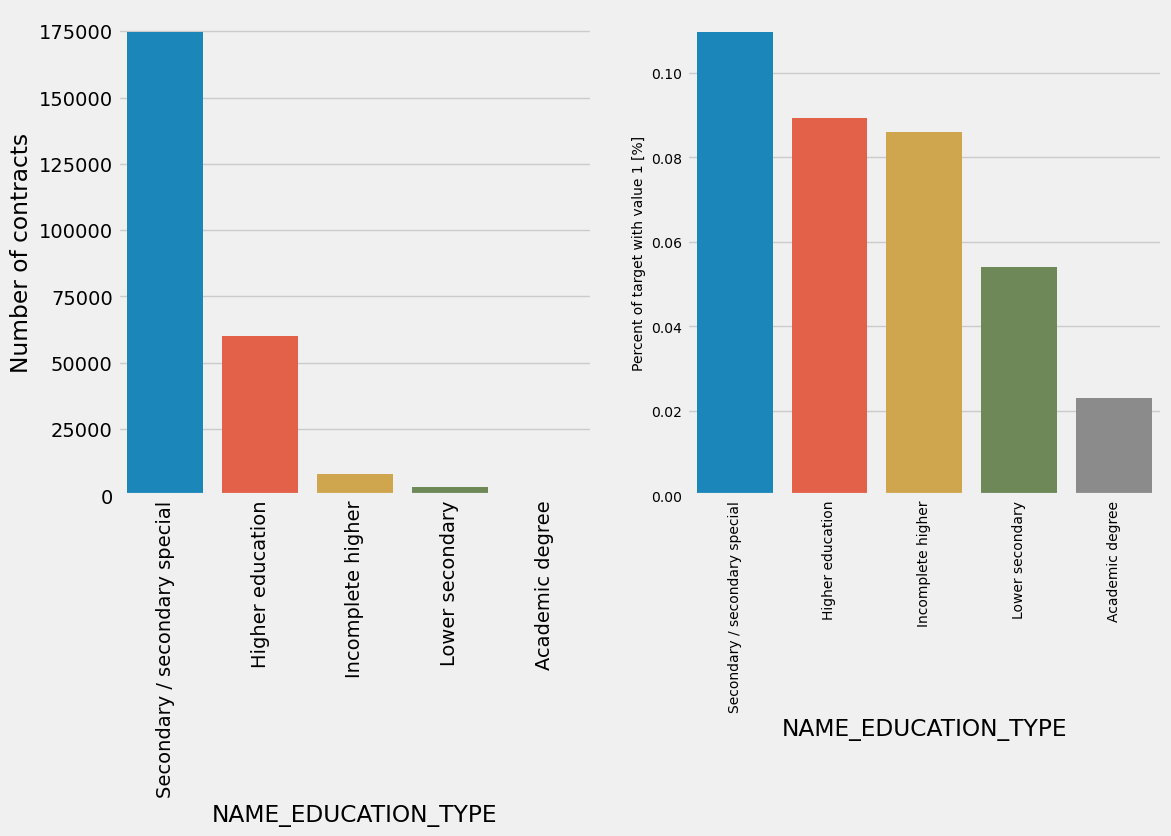

In [73]:
plot_stats('NAME_EDUCATION_TYPE', True)

# EXT_SOURCE

Đa số người vay có trình độ trung học cơ sở / trung học đặc biệt, tiếp theo là các khách hàng có trình độ đại học. Chỉ một số rất nhỏ có bằng cấp.

Nhóm trung học cơ sở, mặc dù hiếm, có tỷ lệ không trả lại khoản vay lớn nhất (11%). Những người có bằng Học vấn có tỷ lệ không hoàn trả dưới 2%.

In [74]:
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.154135,-0.158824,-0.180096,-0.077633
EXT_SOURCE_1,-0.154135,1.000000,0.214697,0.189890,0.600012
EXT_SOURCE_2,-0.158824,0.214697,1.000000,0.110416,0.092282
EXT_SOURCE_3,-0.180096,0.189890,0.110416,1.000000,0.204244
DAYS_BIRTH,-0.077633,0.600012,0.092282,0.204244,1.000000


Tất cả ba features của EXT_SOURCE đều có negative correlations với target, cho thấy rằng khi giá trị của EXT_SOURCE tăng lên, khách hàng có nhiều khả năng hoàn trả khoản vay hơn. Bên cạnh đó, DAYS_BIRTH có positive correlations với EXT_SOURCE_1 -> Một trong các yếu tố trong factor này là độ tuổi của khách hàng.

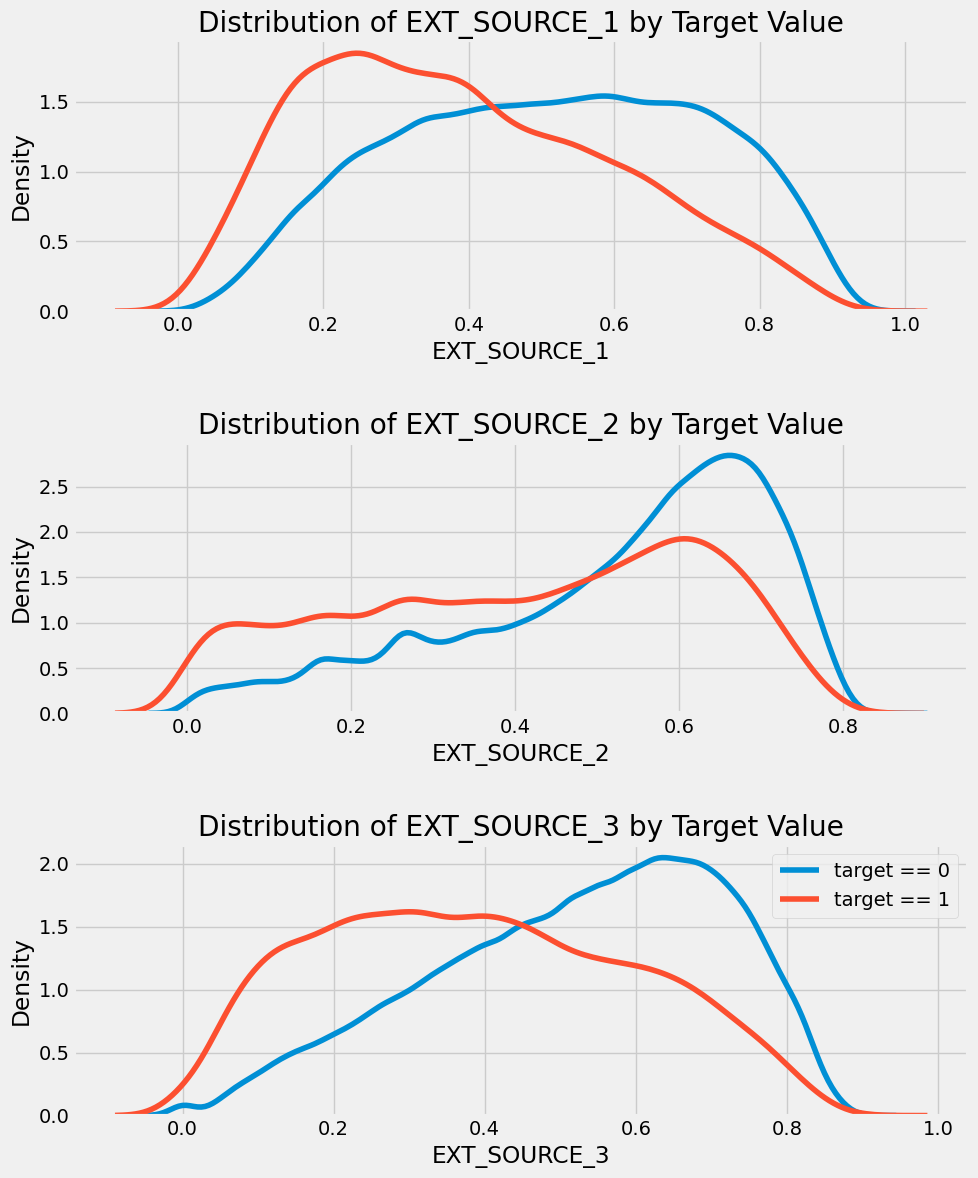

In [75]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density')

plt.legend()
plt.tight_layout(h_pad = 2.5)

Số lượng lớn (56%) entries trong ‘Ext_Source_1’ column là giá trị null -> Chỉ xem xét các giá trị còn lại. Đây là feature đầu tiên mà  có sự khác biệt đáng kể giữa 2 classes -> ‘Ext_Source_1’ sẽ là một feature quan trọng.

EXT_SOURCE_3 hiển thị sự khác biệt lớn nhất giữa các value của target. Feature này có mối quan hệ nào đó với khả năng người nộp đơn hoàn trả khoản vay. Mặc dù các mối quan hệ này đều rất yếu nhưng những biến này vẫn sẽ hữu ích cho mô hình học máy để dự đoán liệu người nộp đơn có trả khoản vay đúng hạn hay không.